In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# set working directory
os.chdir(r"C:\Users\noman\My Drive\ABP\Arima_LSTM")

In [5]:
ts_data_full = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'] , index_col='date')

In [8]:
ts_data = ts_data_full['2009':'2018'] 

<Axes: xlabel='date'>

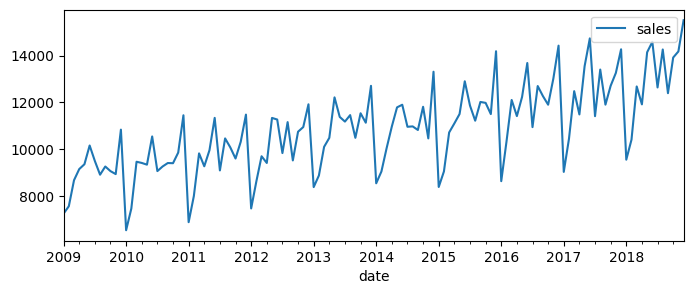

In [13]:
ts_data.plot(figsize=(8, 3))

## Naive Forecast

In [9]:
import matplotlib.pyplot as plt

In [18]:
ts_data_full = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'] , index_col='date')
ts_data = ts_data_full['2009':'2018'] 

In [26]:
ts_data_naive = ts_data.copy()

In [27]:
# Extract the sales value of the most recent period
last_sales_value = ts_data_naive['sales'].iloc[-1]

# Forecast for the next period using naive forecasting
forecast = last_sales_value
print(f'The forecast for the next period is: {forecast}')

The forecast for the next period is: 15504


In [28]:
# Generate naive forecasts (shift the sales column by one period)
ts_data_naive.loc[:, 'forecast'] = ts_data_naive['sales'].shift(1)

# Drop the first row since it does not have a corresponding forecast
ts_data_naive = ts_data_naive.dropna()

# Calculate the errors
ts_data_naive.loc[:, 'error'] = ts_data_naive['sales'] - ts_data_naive['forecast']

# Calculate the squared errors
ts_data_naive.loc[:, 'squared_error'] = ts_data_naive['error'] ** 2

# Compute the Mean Squared Error (MSE)
mse = ts_data_naive['squared_error'].mean()

# Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'The RMSE for the naive forecast is: {rmse}')

The RMSE for the naive forecast is: 1740.4694237837246


In [32]:
# Append the forecast for the next period
next_period_date = ts_data_naive.index[-1] + pd.DateOffset(months=1)
next_period = pd.DataFrame({'sales': [np.nan], 'forecast': [forecast]}, index=[next_period_date])
ts_data_naive = pd.concat([ts_data_naive, next_period])

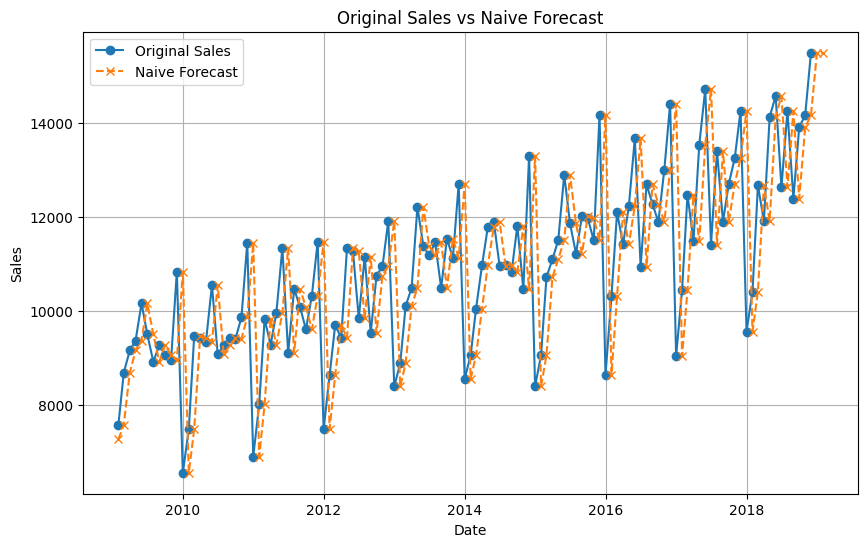

In [33]:


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ts_data_naive.index, ts_data_naive['sales'], label='Original Sales', marker='o')
plt.plot(ts_data_naive.index, ts_data_naive['forecast'], label='Naive Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Naive Forecast')
plt.legend()
plt.grid(True)
plt.show()

## Average Method

In [ ]:
ts_data_full = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'] , index_col='date')
ts_data = ts_data_full['2009':'2018'] 

In [35]:
ts_data_avg = ts_data.copy()

In [37]:
pd.options.mode.copy_on_write = True

# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [38]:
# Initialize a new column for the average forecast
ts_data_avg['avg_forecast'] = np.nan

# Loop through the dataframe to calculate the average forecast for each period
for i in range(1, len(ts_data_avg)):
    ts_data_avg.iloc[i, ts_data_avg.columns.get_loc('avg_forecast')] = ts_data_avg['sales'].iloc[:i].mean()

# Drop the first row since it does not have a corresponding forecast
ts_data_avg = ts_data_avg.dropna()

# Calculate the errors
ts_data_avg['error'] = ts_data_avg['sales'] - ts_data_avg['avg_forecast']

# Calculate the squared errors
ts_data_avg['squared_error'] = ts_data_avg['error'] ** 2

# Compute the Mean Squared Error (MSE)
mse = ts_data_avg['squared_error'].mean()

# Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(ts_data_avg)
print(f'The RMSE for the average forecast is: {rmse}')


            sales  avg_forecast        error  squared_error
date                                                       
2009-02-01   7578   7266.000000   312.000000   9.734400e+04
2009-03-01   8688   7422.000000  1266.000000   1.602756e+06
2009-04-01   9162   7844.000000  1318.000000   1.737124e+06
2009-05-01   9369   8173.500000  1195.500000   1.429220e+06
2009-06-01  10167   8412.600000  1754.400000   3.077919e+06
...           ...           ...          ...            ...
2018-08-01  14257  10731.808696  3525.191304   1.242697e+07
2018-09-01  12396  10762.198276  1633.801724   2.669308e+06
2018-10-01  13914  10776.162393  3137.837607   9.846025e+06
2018-11-01  14174  10802.754237  3371.245763   1.136530e+07
2018-12-01  15504  10831.084034  4672.915966   2.183614e+07

[119 rows x 4 columns]
The RMSE for the average forecast is: 1870.021796702285


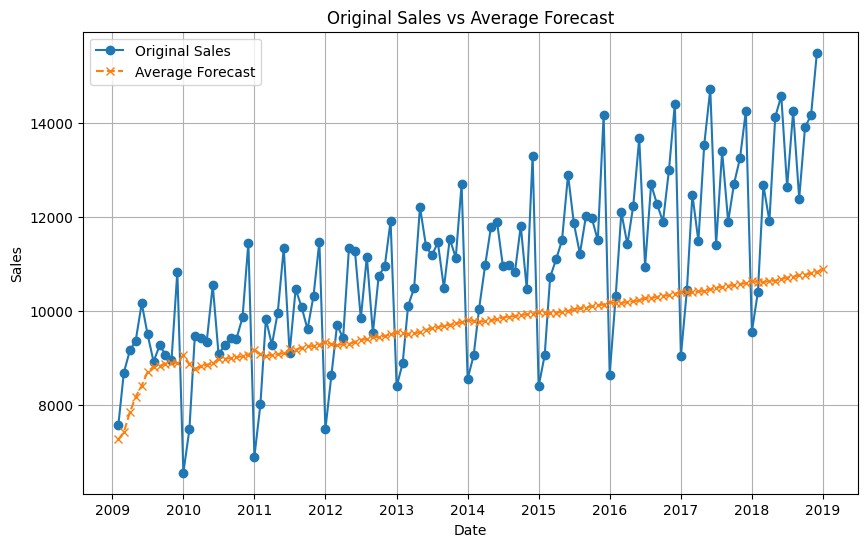

In [39]:
# Append the forecast for the next period
next_period_date = pd.Timestamp(ts_data_avg.index[-1]) + pd.DateOffset(months=1)
next_period = pd.DataFrame({'sales': [np.nan], 'avg_forecast': [ts_data_avg['sales'].mean()]}, index=[next_period_date])
ts_data_avg = pd.concat([ts_data_avg, next_period])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ts_data_avg.index, ts_data_avg['sales'], label='Original Sales', marker='o')
plt.plot(ts_data_avg.index, ts_data_avg['avg_forecast'], label='Average Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Average Forecast')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
ts_data_avg

sales  avg_forecast        error  squared_error
2009-04-01            9162.0   8688.000000   474.000000   2.246760e+05
2009-05-01            9369.0   8925.000000   444.000000   1.971360e+05
2009-06-01           10167.0   9073.000000  1094.000000   1.196836e+06
2009-07-01            9507.0   9346.500000   160.500000   2.576025e+04
2009-08-01            8923.0   9378.600000  -455.600000   2.075714e+05
...                      ...           ...          ...            ...
2018-09-01           12396.0  10820.798246  1575.201754   2.481261e+06
2018-10-01           13914.0  10834.495652  3079.504348   9.483347e+06
2018-11-01           14174.0  10861.043103  3312.956897   1.097568e+07
2018-12-01           15504.0  10889.358974  4614.641026   2.129491e+07
2019-01-01 00:00:00      NaN  10947.615385          NaN            NaN

[118 rows x 4 columns]

## Moving average

In [36]:
ts_data = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'], index_col='date')

In [37]:
ts_data = ts_data['2009':'2018'] 

In [38]:
ts_data

sales
date             
2009-01-01   7266
2009-02-01   7578
2009-03-01   8688
2009-04-01   9162
2009-05-01   9369
...           ...
2018-08-01  14257
2018-09-01  12396
2018-10-01  13914
2018-11-01  14174
2018-12-01  15504

[120 rows x 1 columns]

In [48]:
# make a copy of the original data
ts_data_ma = ts_data.copy()

In [49]:
# Calculate the moving average with a window of 5 periods
ts_data_ma['MA_5'] = ts_data_ma['sales'].rolling(window=5).mean()

# Drop the rows with NaN values resulting from the rolling window
ts_data_ma = ts_data_ma.dropna()

# Calculate the errors
ts_data_ma['error'] = ts_data_ma['sales'] - ts_data_ma['MA_5']

# Calculate the squared errors
ts_data_ma['squared_error'] = ts_data_ma['error'] ** 2

# Compute the Mean Squared Error (MSE)
mse = ts_data_ma['squared_error'].mean()

# Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(ts_data_ma)
print(f'The RMSE for the 5-period moving average forecast is: {rmse}')

            sales     MA_5   error  squared_error
date                                             
2009-05-01   9369   8412.6   956.4      914700.96
2009-06-01  10167   8992.8  1174.2     1378745.64
2009-07-01   9507   9378.6   128.4       16486.56
2009-08-01   8923   9425.6  -502.6      252606.76
2009-09-01   9272   9447.6  -175.6       30835.36
...           ...      ...     ...            ...
2018-08-01  14257  13507.4   749.6      561900.16
2018-09-01  12396  13602.8 -1206.8     1456366.24
2018-10-01  13914  13558.0   356.0      126736.00
2018-11-01  14174  13476.2   697.8      486924.84
2018-12-01  15504  14049.0  1455.0     2117025.00

[116 rows x 4 columns]
The RMSE for the 5-period moving average forecast is: 1204.0112320475055


In [50]:
ts_data_ma

sales     MA_5   error  squared_error
date                                             
2009-05-01   9369   8412.6   956.4      914700.96
2009-06-01  10167   8992.8  1174.2     1378745.64
2009-07-01   9507   9378.6   128.4       16486.56
2009-08-01   8923   9425.6  -502.6      252606.76
2009-09-01   9272   9447.6  -175.6       30835.36
...           ...      ...     ...            ...
2018-08-01  14257  13507.4   749.6      561900.16
2018-09-01  12396  13602.8 -1206.8     1456366.24
2018-10-01  13914  13558.0   356.0      126736.00
2018-11-01  14174  13476.2   697.8      486924.84
2018-12-01  15504  14049.0  1455.0     2117025.00

[116 rows x 4 columns]

In [51]:
# Forecast for the next period using the average of the last 5 periods
last_5_sales = ts_data_ma['sales'].iloc[-5:]
next_forecast = last_5_sales.mean()

# Append the forecast for the next period to the DataFrame
next_period_date = ts_data_ma.index[-1] + pd.DateOffset(months=1)
forecast_df = pd.DataFrame({'sales': [np.nan], 'MA_5': [next_forecast]}, index=[next_period_date])
ts_data_ma = pd.concat([ts_data_ma, forecast_df])

In [52]:
ts_data_ma

sales     MA_5   error  squared_error
2009-05-01   9369.0   8412.6   956.4      914700.96
2009-06-01  10167.0   8992.8  1174.2     1378745.64
2009-07-01   9507.0   9378.6   128.4       16486.56
2009-08-01   8923.0   9425.6  -502.6      252606.76
2009-09-01   9272.0   9447.6  -175.6       30835.36
...             ...      ...     ...            ...
2018-09-01  12396.0  13602.8 -1206.8     1456366.24
2018-10-01  13914.0  13558.0   356.0      126736.00
2018-11-01  14174.0  13476.2   697.8      486924.84
2018-12-01  15504.0  14049.0  1455.0     2117025.00
2019-01-01      NaN  14049.0     NaN            NaN

[117 rows x 4 columns]

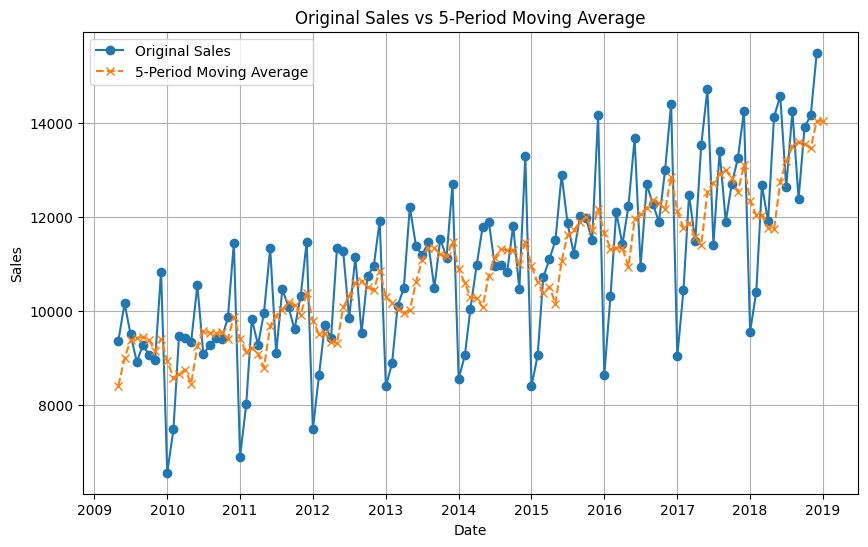

In [53]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ts_data_ma.index, ts_data_ma['sales'], label='Original Sales', marker='o')
plt.plot(ts_data_ma.index, ts_data_ma['MA_5'], label='5-Period Moving Average', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs 5-Period Moving Average')
plt.legend()
plt.grid(True)
plt.show()

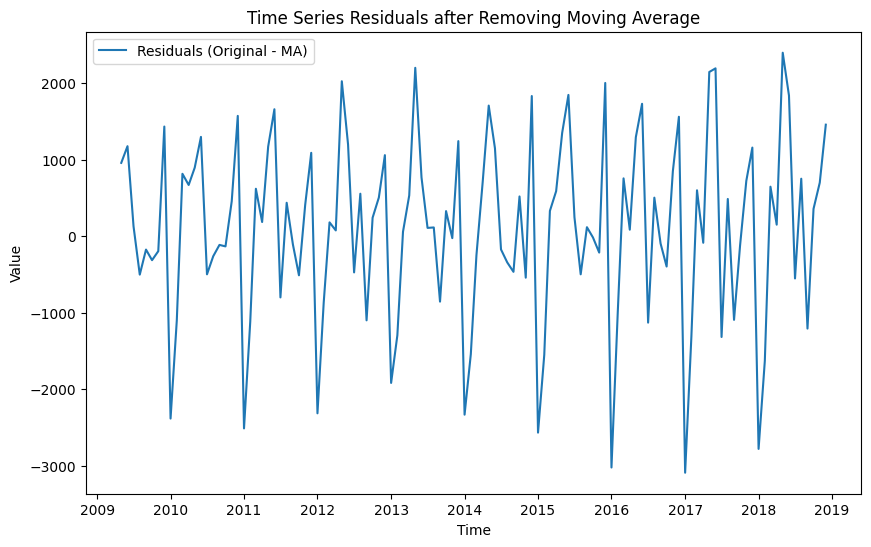

In [54]:
# Now plotting the ts data subtracting the moving average (additive) from this data

# Subtracting the moving average from the original time series to get the residuals
ts_data_residuals = ts_data_ma['sales'] - ts_data_ma['MA_5']

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.plot(ts_data_residuals, label='Residuals (Original - MA)')
plt.title('Time Series Residuals after Removing Moving Average')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


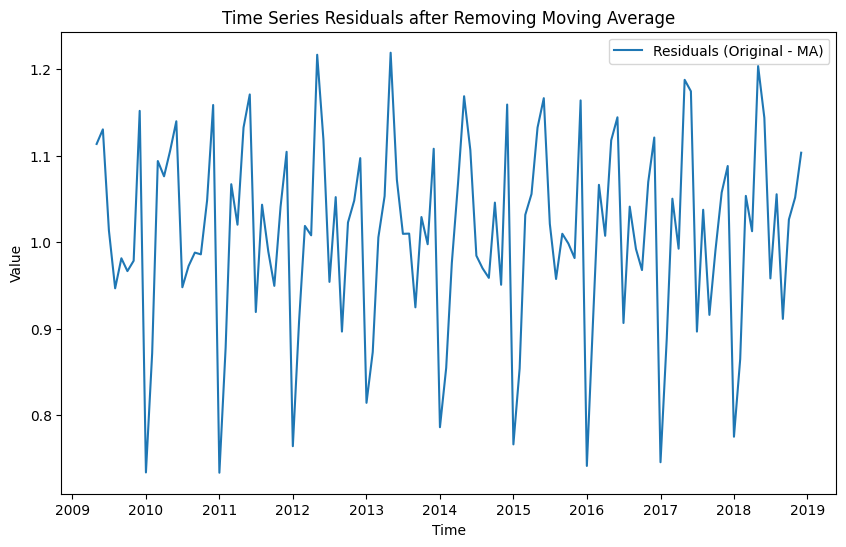

In [55]:
# Now plotting the ts data divided by the moving average (multiplicative) from this data

# Assuming ts_data and ts_data_ma are already defined from the previous steps
# Subtracting the moving average from the original time series to get the residuals
ts_data_residuals = ts_data_ma['sales'] / ts_data_ma['MA_5']

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.plot(ts_data_residuals, label='Residuals (Original - MA)')
plt.title('Time Series Residuals after Removing Moving Average')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Simple Exp smoothing

In [56]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [32]:
# Load the data
df = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'], index_col='date')
ts_data = df['2009':'2018']

In [57]:
# Fit the Simple Exponential Smoothing (SES) model
ses_model = SimpleExpSmoothing(ts_data['sales']).fit(smoothing_level=0.2, optimized=False)

# Generate forecast for the next period
forecast_ses = ses_model.forecast(12)

# Print the forecast
print(f'The SES forecast for the next period is: {forecast_ses.iloc[0]}')

# Add the SES forecast to the data for plotting
ts_data['SES_Forecast'] = ses_model.fittedvalues

# Calculate RMSE
ses_error = ts_data['sales'] - ts_data['SES_Forecast']
ses_rmse = np.sqrt(np.mean(ses_error ** 2))

print(f'The RMSE for the SES forecast is: {ses_rmse}')



The SES forecast for the next period is: 13792.973881290553
The RMSE for the SES forecast is: 1380.6099178842426


c:\Users\noman\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


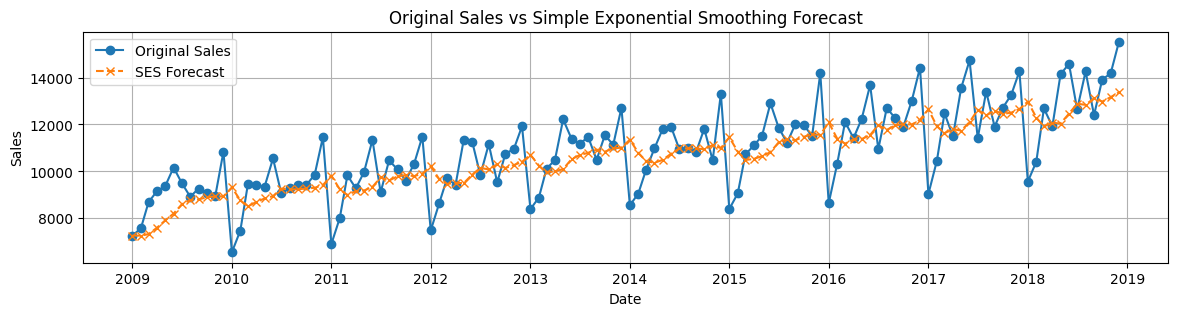

In [67]:
# Plotting the original sales and SES forecast
plt.figure(figsize=(14, 3))
plt.plot(ts_data.index, ts_data['sales'], label='Original Sales', marker='o')
plt.plot(ts_data.index, ts_data['SES_Forecast'], label='SES Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Simple Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()


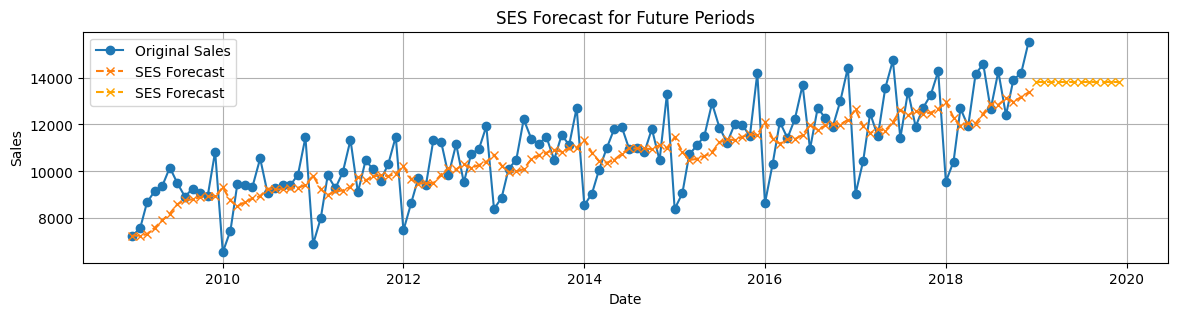

In [68]:
# Plotting the forecasted future periods
plt.figure(figsize=(14, 3))
plt.plot(ts_data.index, ts_data['sales'], label='Original Sales', marker='o')
plt.plot(ts_data.index, ts_data['SES_Forecast'], label='SES Forecast', linestyle='--', marker='x')

plt.plot(forecast_ses.index, forecast_ses, label='SES Forecast', linestyle='--', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SES Forecast for Future Periods')
plt.legend()
plt.grid(True)
plt.show()

Explanation of Parameters:

    smoothing_level=0.2: This defines the smoothing factor (alpha). It can be adjusted between 0 and 1, where a value closer to 1 gives more weight to recent observations.
    optimized=False: If set to True, the model will find the optimal smoothing level automatically. Here, we use a fixed alpha of 0.2 for simplicity.

# Holts exponential smoothing

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Load the data
df = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'], index_col='date')
ts_data = df['2009':'2018']

In [78]:
# Fit the Holt's Exponential Smoothing model
# Here, we assume an additive trend without seasonality
holt_model = ExponentialSmoothing(ts_data['sales'], 
                                  trend='add', 
                                  seasonal=None).fit(
                                  smoothing_level=0.8,  # alpha
                                  smoothing_trend=0.2,  # beta
                                  optimized=False)  # Set to False to use these values

# Generate forecast for the next 12 periods (e.g., 12 months if monthly data)
forecast_holt = holt_model.forecast(12)

# Print the forecast
print(f'The Holt\'s forecast for the next 12 periods is:\n{forecast_holt}')

The Holt's forecast for the next 12 periods is:
2019-01-01    15645.051446
2019-02-01    16029.001884
2019-03-01    16412.952322
2019-04-01    16796.902760
2019-05-01    17180.853197
2019-06-01    17564.803635
2019-07-01    17948.754073
2019-08-01    18332.704511
2019-09-01    18716.654949
2019-10-01    19100.605387
2019-11-01    19484.555824
2019-12-01    19868.506262
Freq: MS, dtype: float64


c:\Users\noman\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [79]:
# Add the Holt's forecast to the original data for plotting
ts_data['Holt_Forecast'] = holt_model.fittedvalues

# Calculate RMSE
holt_error = ts_data['sales'] - ts_data['Holt_Forecast']
holt_rmse = np.sqrt(np.mean(holt_error ** 2))

print(f'The RMSE for the Holt\'s forecast is: {holt_rmse}')

The RMSE for the Holt's forecast is: 1741.1697559002191


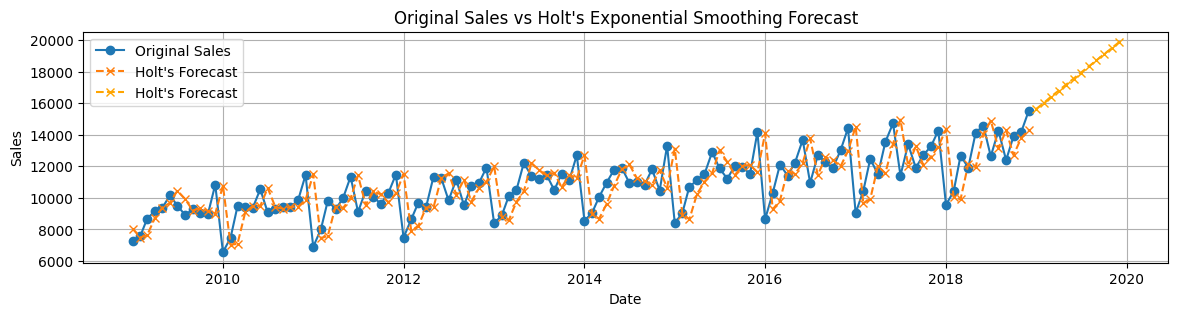

In [80]:
# Plotting the original sales and Holt's forecast
plt.figure(figsize=(14, 3))
plt.plot(ts_data.index, ts_data['sales'], label='Original Sales', marker='o')
plt.plot(ts_data.index, ts_data['Holt_Forecast'], label='Holt\'s Forecast', linestyle='--', marker='x')
plt.plot(forecast_holt.index, forecast_holt, label='Holt\'s Forecast', linestyle='--', marker='x', color='orange')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Holt\'s Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()

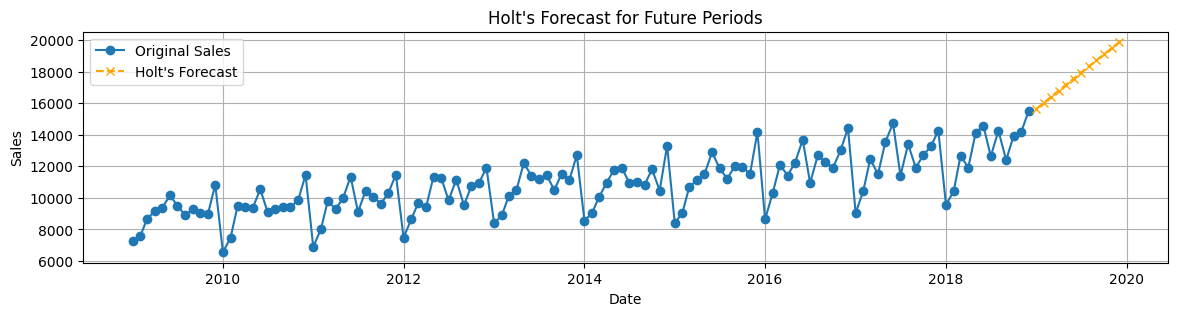

In [81]:
# Plotting the forecasted future periods
plt.figure(figsize=(14, 3))
plt.plot(ts_data.index, ts_data['sales'], label='Original Sales', marker='o')
plt.plot(forecast_holt.index, forecast_holt, label='Holt\'s Forecast', linestyle='--', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Holt\'s Forecast for Future Periods')
plt.legend()
plt.grid(True)
plt.show()

# Holts - Winter Exp smoothing

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
# Load the data
df = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'], index_col='date')
ts_data = df['2009':'2018']

In [14]:
# Fit the Holt-Winters Exponential Smoothing model
# Here, we assume additive trend and seasonality
hw_model = ExponentialSmoothing(ts_data['sales'], 
                                trend='add', 
                                seasonal='add', 
                                seasonal_periods=12).fit()

# Generate forecast for the next 12 periods (e.g., 12 months if monthly data)
forecast_hw = hw_model.forecast(12)

# Print the forecast
print(f'The Holt-Winters forecast for the next 12 periods is:\n{forecast_hw}')

The Holt-Winters forecast for the next 12 periods is:
2019-01-01    10758.881408
2019-02-01    11740.374623
2019-03-01    13390.110165
2019-04-01    13225.538637
2019-05-01    14420.973573
2019-06-01    15053.267323
2019-07-01    13444.700223
2019-08-01    14253.623671
2019-09-01    13665.731760
2019-10-01    14103.167985
2019-11-01    14280.664636
2019-12-01    15800.632526
Freq: MS, dtype: float64


c:\Users\noman\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:

# Fit the Holt-Winters Exponential Smoothing model with custom alpha, beta, and gamma
hw_model = ExponentialSmoothing(ts_data['sales'], 
                                trend='add', 
                                seasonal='add', 
                                seasonal_periods=12).fit(
                                smoothing_level=0.5,  # alpha
                                smoothing_trend=0.3,  # beta
                                smoothing_seasonal=0.4,  # gamma
                                optimized=False)  # Set to False to use these values

# Generate forecast for the next 12 periods (e.g., 12 months if monthly data)
forecast_hw = hw_model.forecast(12)

# Print the forecast
print(f'The Holt-Winters forecast for the next 12 periods is:\n{forecast_hw}')

The Holt-Winters forecast for the next 12 periods is:
2019-01-01    10740.345910
2019-02-01    12080.174057
2019-03-01    14364.112929
2019-04-01    13844.963249
2019-05-01    15876.320158
2019-06-01    16633.895762
2019-07-01    14450.625444
2019-08-01    16016.959425
2019-09-01    14711.882587
2019-10-01    15909.258697
2019-11-01    16138.939758
2019-12-01    17432.235661
Freq: MS, dtype: float64


c:\Users\noman\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
# Add the Holt-Winters forecast to the original data for plotting
ts_data['HW_Forecast'] = hw_model.fittedvalues

# Calculate RMSE
hw_error = ts_data['sales'] - ts_data['HW_Forecast']
hw_rmse = np.sqrt(np.mean(hw_error ** 2))

print(f'The RMSE for the Holt-Winters forecast is: {hw_rmse}')

The RMSE for the Holt-Winters forecast is: 596.4622268652987


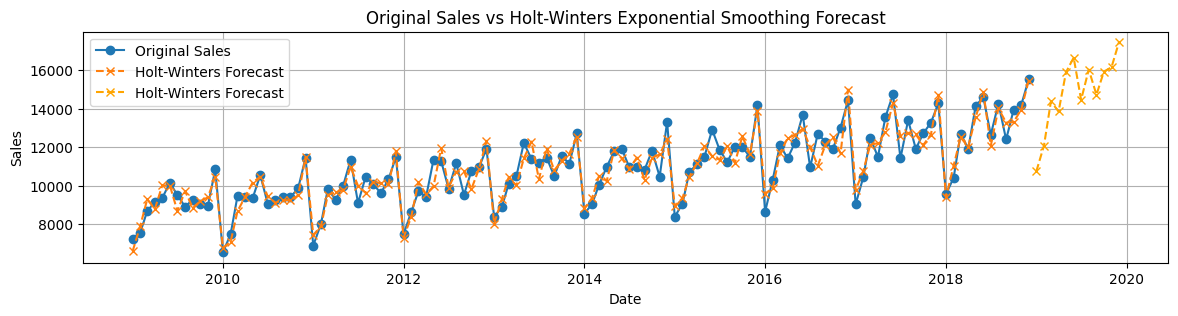

In [86]:
# Plotting the original sales and Holt-Winters forecast
plt.figure(figsize=(14, 3))
plt.plot(ts_data.index, ts_data['sales'], label='Original Sales', marker='o')
plt.plot(ts_data.index, ts_data['HW_Forecast'], label='Holt-Winters Forecast', linestyle='--', marker='x')
plt.plot(forecast_hw.index, forecast_hw, label='Holt-Winters Forecast', linestyle='--', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Holt-Winters Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()




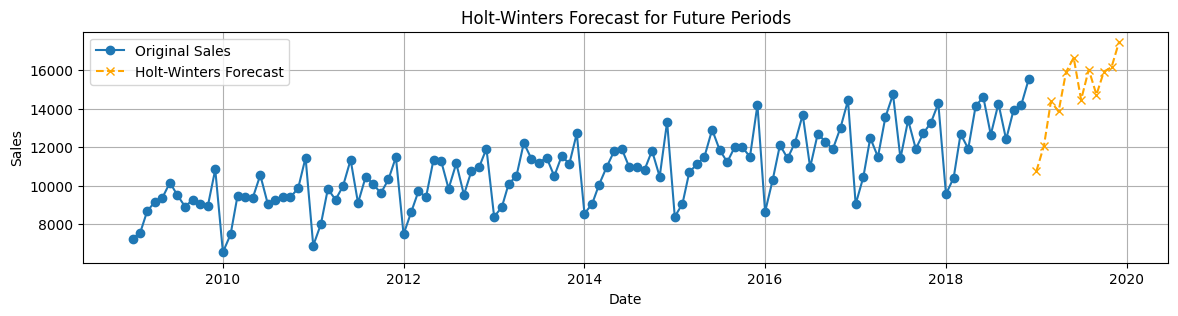

In [87]:
# Plotting the forecasted future periods
plt.figure(figsize=(14, 3))
plt.plot(ts_data.index, ts_data['sales'], label='Original Sales', marker='o')
plt.plot(forecast_hw.index, forecast_hw, label='Holt-Winters Forecast', linestyle='--', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Holt-Winters Forecast for Future Periods')
plt.legend()
plt.grid(True)
plt.show()

# Simple linear regression


In [89]:
from sklearn.linear_model import LinearRegression

In [41]:
# Load the data
df = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'], index_col='date')
ts_data = df['2009':'2018']

In [90]:
# Prepare the data for linear regression
ts_data = ts_data.reset_index()  # Remove the date index for easier handling
ts_data['time'] = np.arange(len(ts_data))  # Create a time variable

# Define the independent variable (X) and dependent variable (y)
X = ts_data[['time']]  # Time as the independent variable
y = ts_data['sales']  # Sales as the dependent variable

# Fit the Linear Regression model
model = LinearRegression().fit(X, y)

# Generate predictions (fitted values)
ts_data['LR_Fitted'] = model.predict(X)

# Forecast the next 12 periods
future_time = np.arange(len(ts_data), len(ts_data) + 12).reshape(-1, 1)
future_forecast = model.predict(future_time)

# Print the forecasted values
print(f'The forecast for the next 12 periods is:\n{future_forecast}')

The forecast for the next 12 periods is:
[13227.28991597 13266.25297243 13305.21602889 13344.17908535
 13383.14214182 13422.10519828 13461.06825474 13500.0313112
 13538.99436766 13577.95742413 13616.92048059 13655.88353705]


c:\Users\noman\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


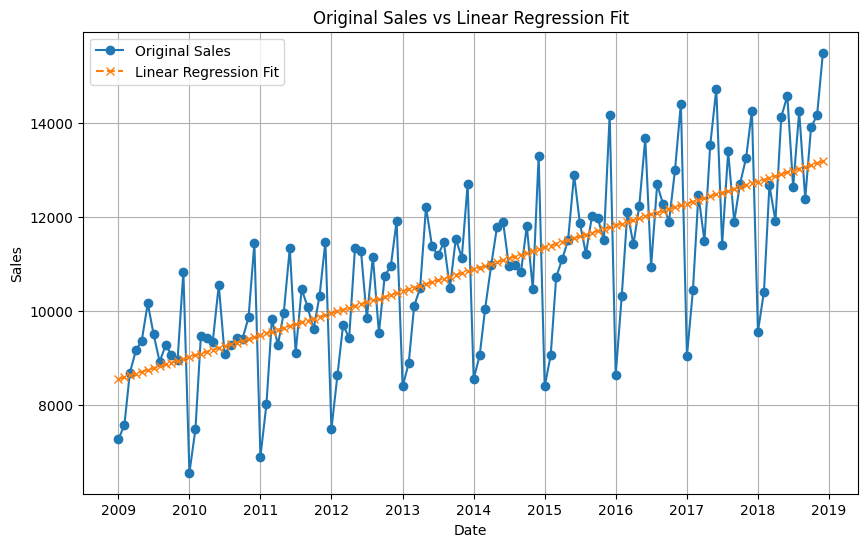

In [43]:
# Plot the original sales data and the fitted linear regression line
plt.figure(figsize=(10, 6))
plt.plot(ts_data['date'], ts_data['sales'], label='Original Sales', marker='o')
plt.plot(ts_data['date'], ts_data['LR_Fitted'], label='Linear Regression Fit', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()




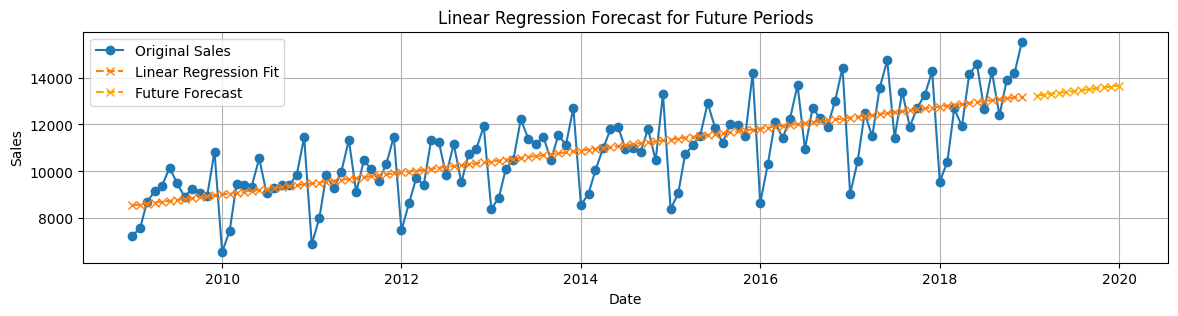

In [91]:
# Plotting the forecasted future periods
future_dates = pd.date_range(start=ts_data['date'].iloc[-1], periods=13, freq='M')[1:]  # Generate future dates
plt.figure(figsize=(14, 3))
plt.plot(ts_data['date'], ts_data['sales'], label='Original Sales', marker='o')
plt.plot(ts_data['date'], ts_data['LR_Fitted'], label='Linear Regression Fit', linestyle='--', marker='x')
plt.plot(future_dates, future_forecast, label='Future Forecast', linestyle='--', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Linear Regression Forecast for Future Periods')
plt.legend()
plt.grid(True)
plt.show()

# Regression with months as dummy

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [104]:
# Load the data
df = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'], index_col='date')
ts_data = df['2009':'2018']

In [105]:
# Prepare the data for regression
ts_data = ts_data.reset_index()  # Remove the date index for easier handling
ts_data['time'] = np.arange(len(ts_data))  # Create a time variable
ts_data['month'] = ts_data['date'].dt.month  # Extract month from date
ts_data.head()

date  sales  time  month
0 2009-01-01   7266     0      1
1 2009-02-01   7578     1      2
2 2009-03-01   8688     2      3
3 2009-04-01   9162     3      4
4 2009-05-01   9369     4      5

In [106]:
# Apply one-hot encoding to the month
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected parameter name
month_encoded = encoder.fit_transform(ts_data[['month']])
ts_data.head()

date  sales  time  month
0 2009-01-01   7266     0      1
1 2009-02-01   7578     1      2
2 2009-03-01   8688     2      3
3 2009-04-01   9162     3      4
4 2009-05-01   9369     4      5

In [107]:
# Add the encoded month columns to the dataframe
month_encoded_df = pd.DataFrame(month_encoded, columns=[f'month_{i}' for i in range(2, 13)])
ts_data = pd.concat([ts_data, month_encoded_df], axis=1)
ts_data.head()

date  sales  time  month  month_2  month_3  month_4  month_5  month_6  \
0 2009-01-01   7266     0      1      0.0      0.0      0.0      0.0      0.0   
1 2009-02-01   7578     1      2      1.0      0.0      0.0      0.0      0.0   
2 2009-03-01   8688     2      3      0.0      1.0      0.0      0.0      0.0   
3 2009-04-01   9162     3      4      0.0      0.0      1.0      0.0      0.0   
4 2009-05-01   9369     4      5      0.0      0.0      0.0      1.0      0.0   

   month_7  month_8  month_9  month_10  month_11  month_12  
0      0.0      0.0      0.0       0.0       0.0       0.0  
1      0.0      0.0      0.0       0.0       0.0       0.0  
2      0.0      0.0      0.0       0.0       0.0       0.0  
3      0.0      0.0      0.0       0.0       0.0       0.0  
4      0.0      0.0      0.0       0.0       0.0       0.0

In [108]:
# Define the independent variables (X) and dependent variable (y)
X = ts_data[['time'] + [f'month_{i}' for i in range(2, 13)]]  # Time and month dummies as X
y = ts_data['sales']  # Sales as the dependent variable
X.head()

time  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0     0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1     1      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     2      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3     3      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
4     4      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

   month_9  month_10  month_11  month_12  
0      0.0       0.0       0.0       0.0  
1      0.0       0.0       0.0       0.0  
2      0.0       0.0       0.0       0.0  
3      0.0       0.0       0.0       0.0  
4      0.0       0.0       0.0       0.0

In [109]:
# Fit the Linear Regression model
model = LinearRegression().fit(X, y)

# Generate predictions (fitted values)
ts_data['LR_Fitted'] = model.predict(X)



In [111]:
# Forecast the next 12 periods
future_time = np.arange(len(ts_data), len(ts_data) + 12).reshape(-1, 1)

# Create a DataFrame for future months with the same structure as the original data
future_months_df = pd.DataFrame({'month': np.tile(np.arange(1, 13), int(np.ceil(len(future_time) / 12)))[:len(future_time)]})

# Apply one-hot encoding to future months
future_month_encoded = encoder.transform(future_months_df)

# Convert the future month encoded data to a DataFrame with proper column names
future_month_encoded_df = pd.DataFrame(future_month_encoded, columns=[f'month_{i}' for i in range(2, 13)])

# Combine the time and month features
future_X = np.hstack([future_time, future_month_encoded_df])

# Ensure future_X is also a DataFrame with proper column names
future_X = pd.DataFrame(future_X, columns=['time'] + [f'month_{i}' for i in range(2, 13)])

# Predict future sales
future_forecast = model.predict(future_X)

# Print the forecasted values
print(f'The forecast for the next 12 periods is:\n{future_forecast}')


The forecast for the next 12 periods is:
[10493.81388889 11403.11388889 12998.21388889 12881.71388889
 13958.81388889 14664.41388889 13068.11388889 13797.41388889
 13234.81388889 13684.41388889 13778.11388889 15421.51388889]


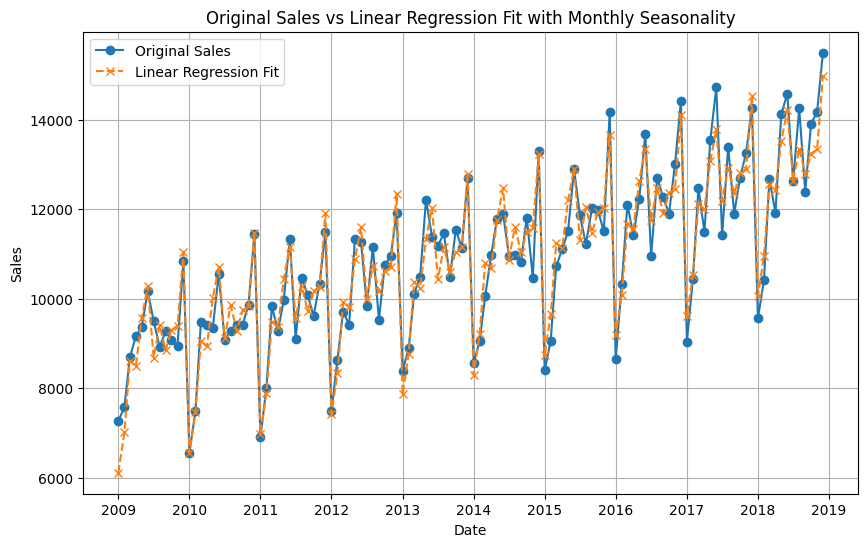

In [49]:
# Plot the original sales data and the fitted linear regression line
plt.figure(figsize=(10, 6))
plt.plot(ts_data['date'], ts_data['sales'], label='Original Sales', marker='o')
plt.plot(ts_data['date'], ts_data['LR_Fitted'], label='Linear Regression Fit', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Linear Regression Fit with Monthly Seasonality')
plt.legend()
plt.grid(True)
plt.show()

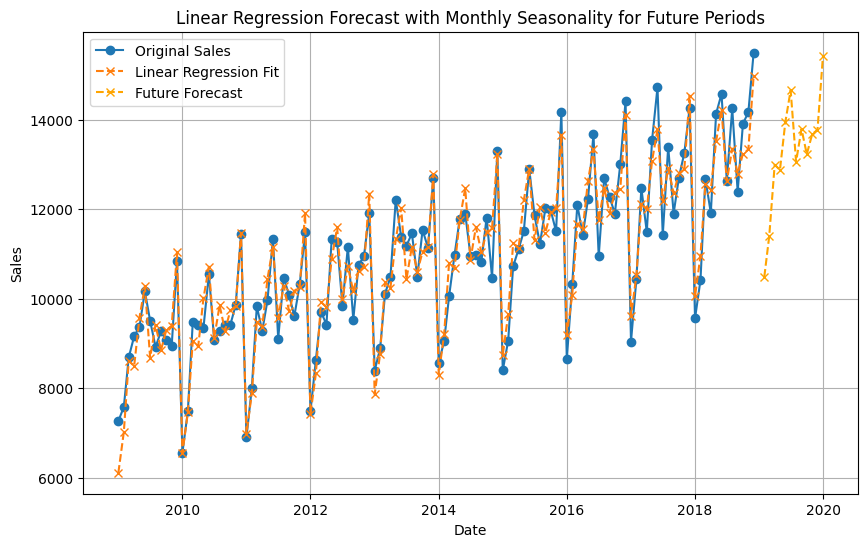

In [112]:
# Plotting the forecasted future periods
future_dates = pd.date_range(start=ts_data['date'].iloc[-1], periods=13, freq='M')[1:]  # Generate future dates
plt.figure(figsize=(10, 6))
plt.plot(ts_data['date'], ts_data['sales'], label='Original Sales', marker='o')
plt.plot(ts_data['date'], ts_data['LR_Fitted'], label='Linear Regression Fit', linestyle='--', marker='x')
plt.plot(future_dates, future_forecast, label='Future Forecast', linestyle='--', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Linear Regression Forecast with Monthly Seasonality for Future Periods')
plt.legend()
plt.grid(True)
plt.show()

### Now regular decomposition

In [113]:
import statsmodels.api as sm

In [115]:
# Load the data
df = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'], index_col='date')
ts_data = df['2009':'2018']

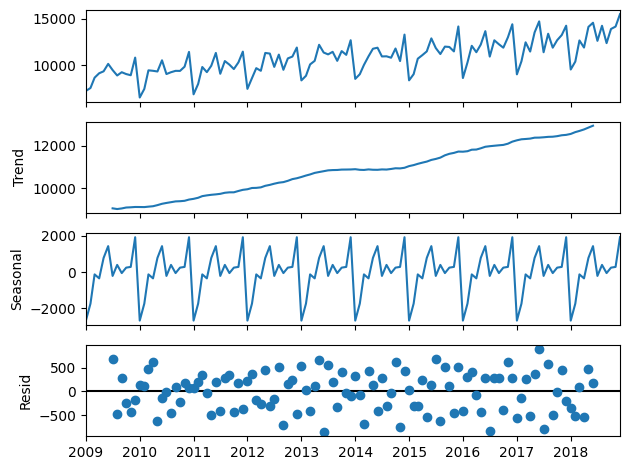

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series using an additive model
result_add = seasonal_decompose(ts_data, model='additive', period=12)

# Plotting the decomposed components
result_add.plot()
plt.show()


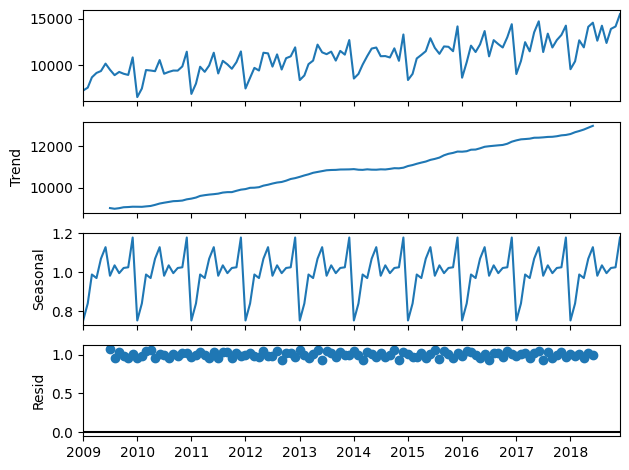

In [117]:
result_add = seasonal_decompose(ts_data, model='multiplicative', period=12)

# Plotting the decomposed components
result_add.plot()
plt.show()

====================================

The above "diagnostic" tool will now help us to decide between ARIMA vs SARIMAX. 

We can also use acf and pacf to decide about the parameter values.

===========================================

### Drawing lagplots to invstigate auto correlation

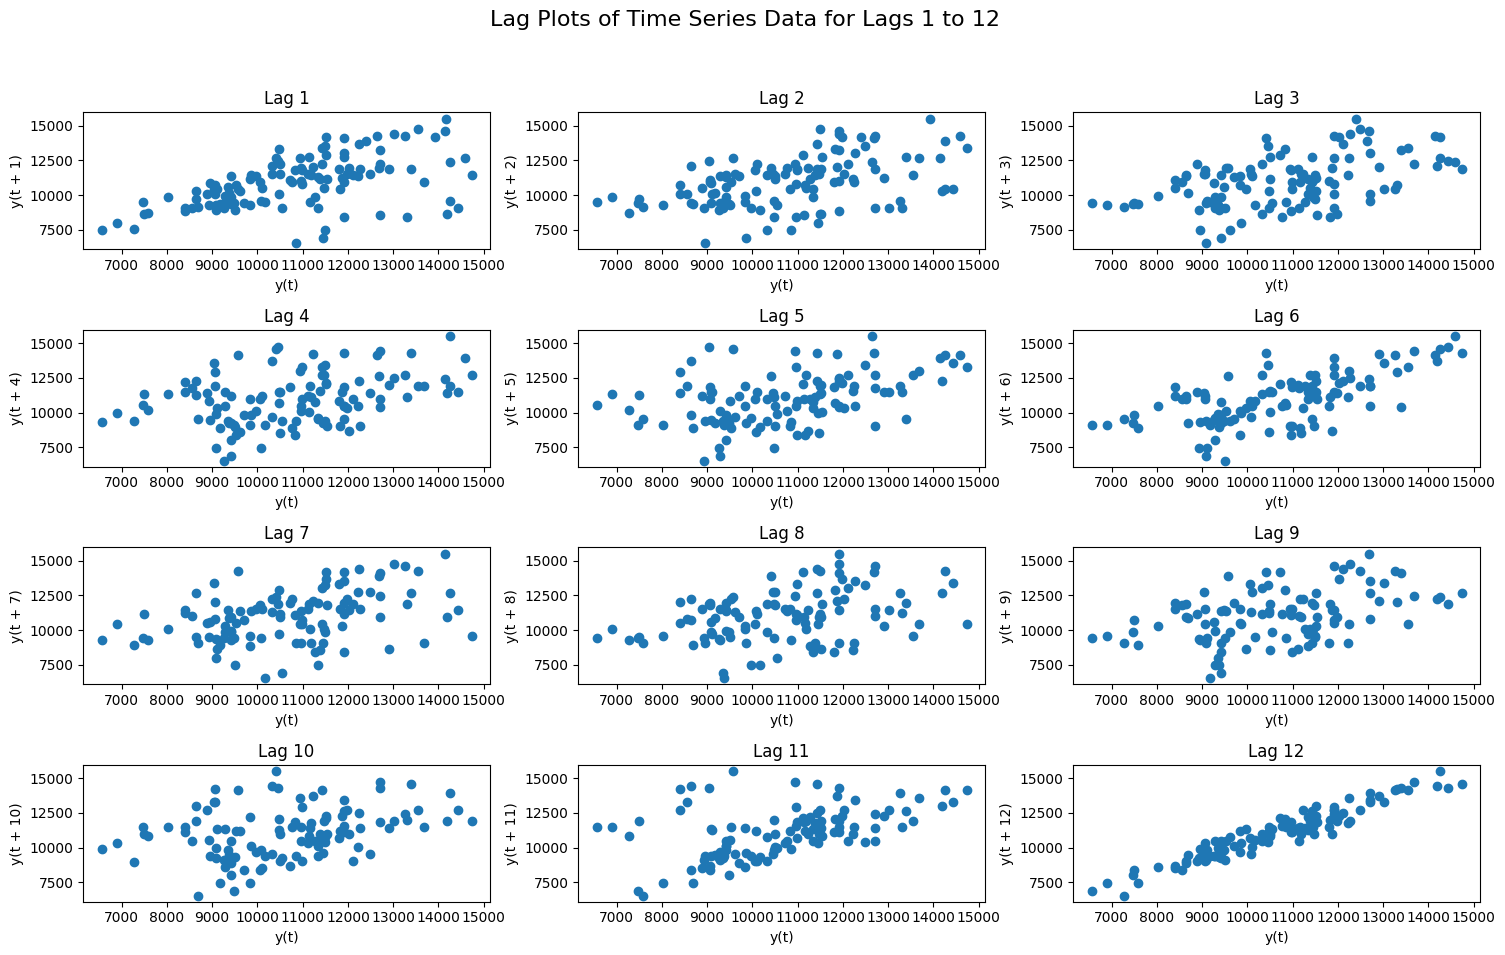

In [118]:
from pandas.plotting import lag_plot

# Creating subplots for lag plots from 1 to 12
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
fig.suptitle('Lag Plots of Time Series Data for Lags 1 to 12', fontsize=16)

# Generating lag plots for each lag value
for i, ax in enumerate(axes.flatten(), 1):
    lag_plot(ts_data, lag=i, ax=ax)
    ax.set_title(f'Lag {i}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Example of white noise

https://www.youtube.com/watch?v=iO3yXnnSksM&list=PLD8eCxFKntVETvfPd-diUORGYLAL6idBv&index=21

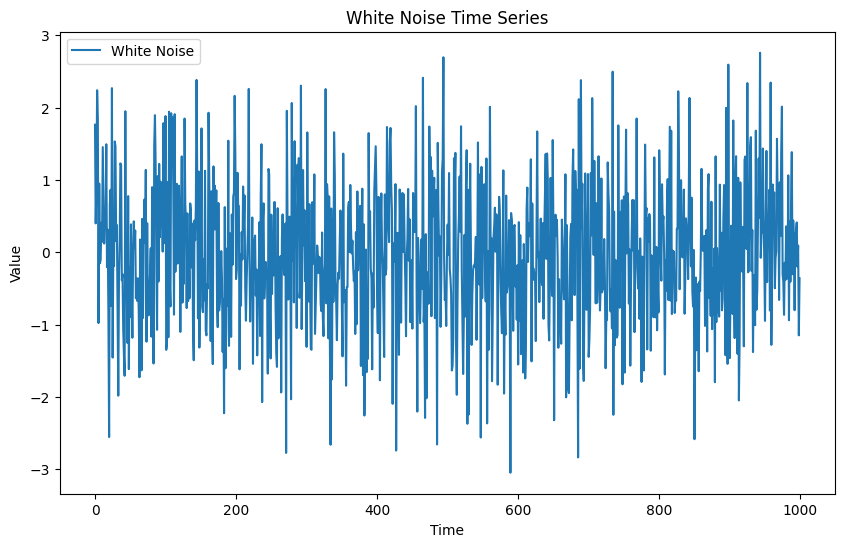

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Generate white noise
np.random.seed(0) # For reproducibility
white_noise = np.random.normal(loc=0, scale=1, size=1000) # mean=0, std=1, n=1000

# Plot the white noise
plt.figure(figsize=(10, 6))
plt.plot(white_noise, label='White Noise')
plt.title('White Noise Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


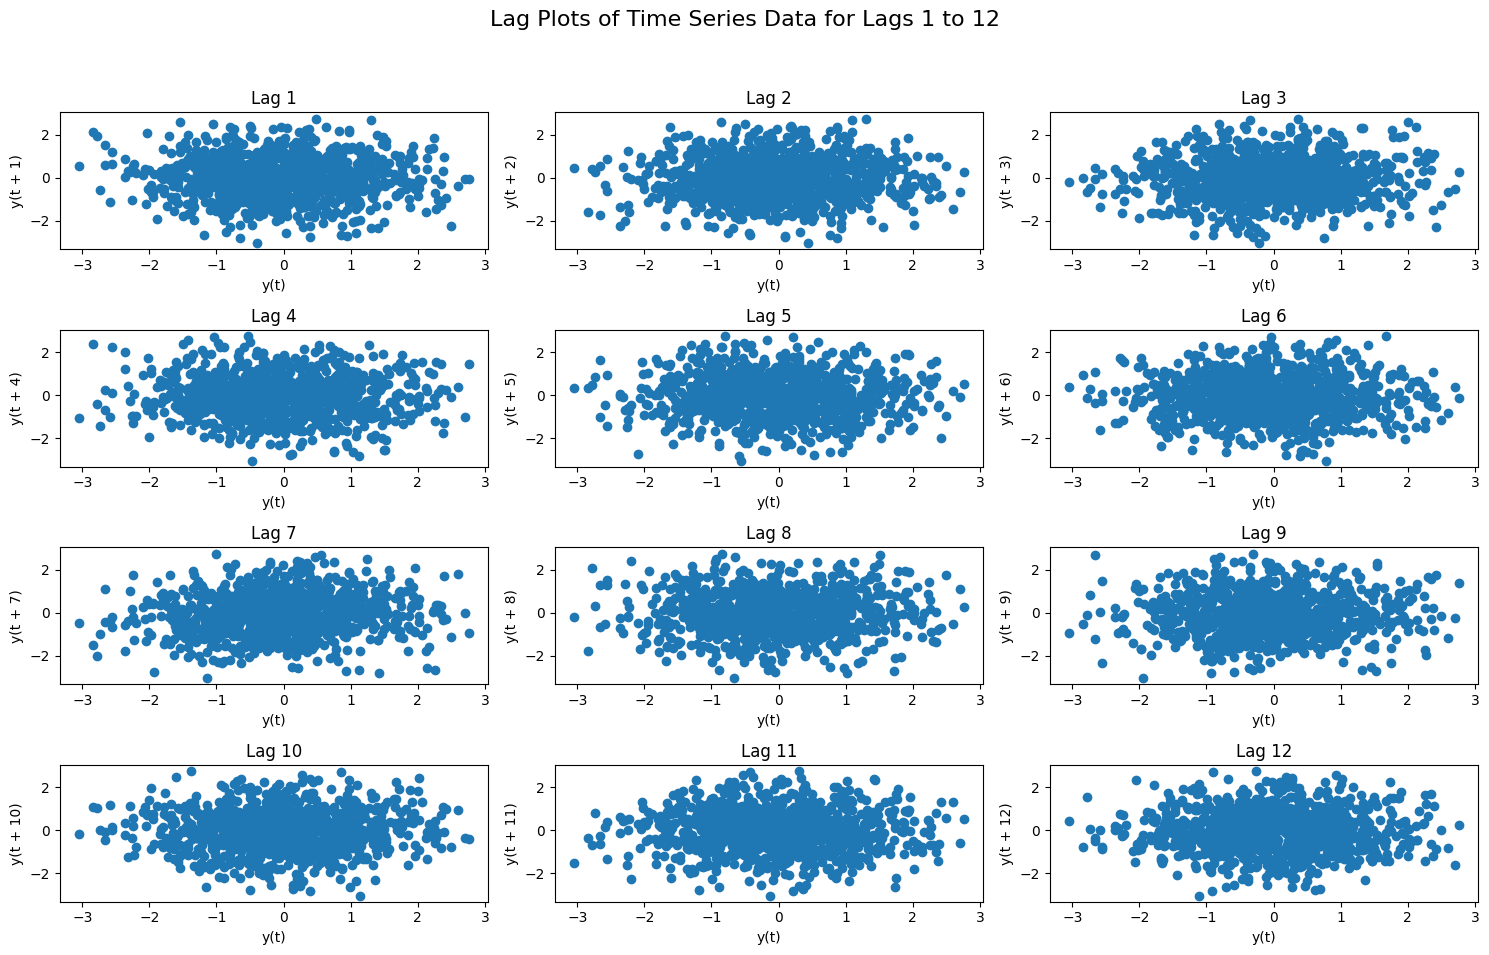

In [52]:
# Convert the numpy array to a pandas Series
white_noise_series = pd.Series(white_noise)

# Creating subplots for lag plots from 1 to 12
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
fig.suptitle('Lag Plots of Time Series Data for Lags 1 to 12', fontsize=16)

# Generating lag plots for each lag value
for i, ax in enumerate(axes.flatten(), 1):
    lag_plot(white_noise_series, lag=i, ax=ax)
    ax.set_title(f'Lag {i}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## ACF() and pacf()


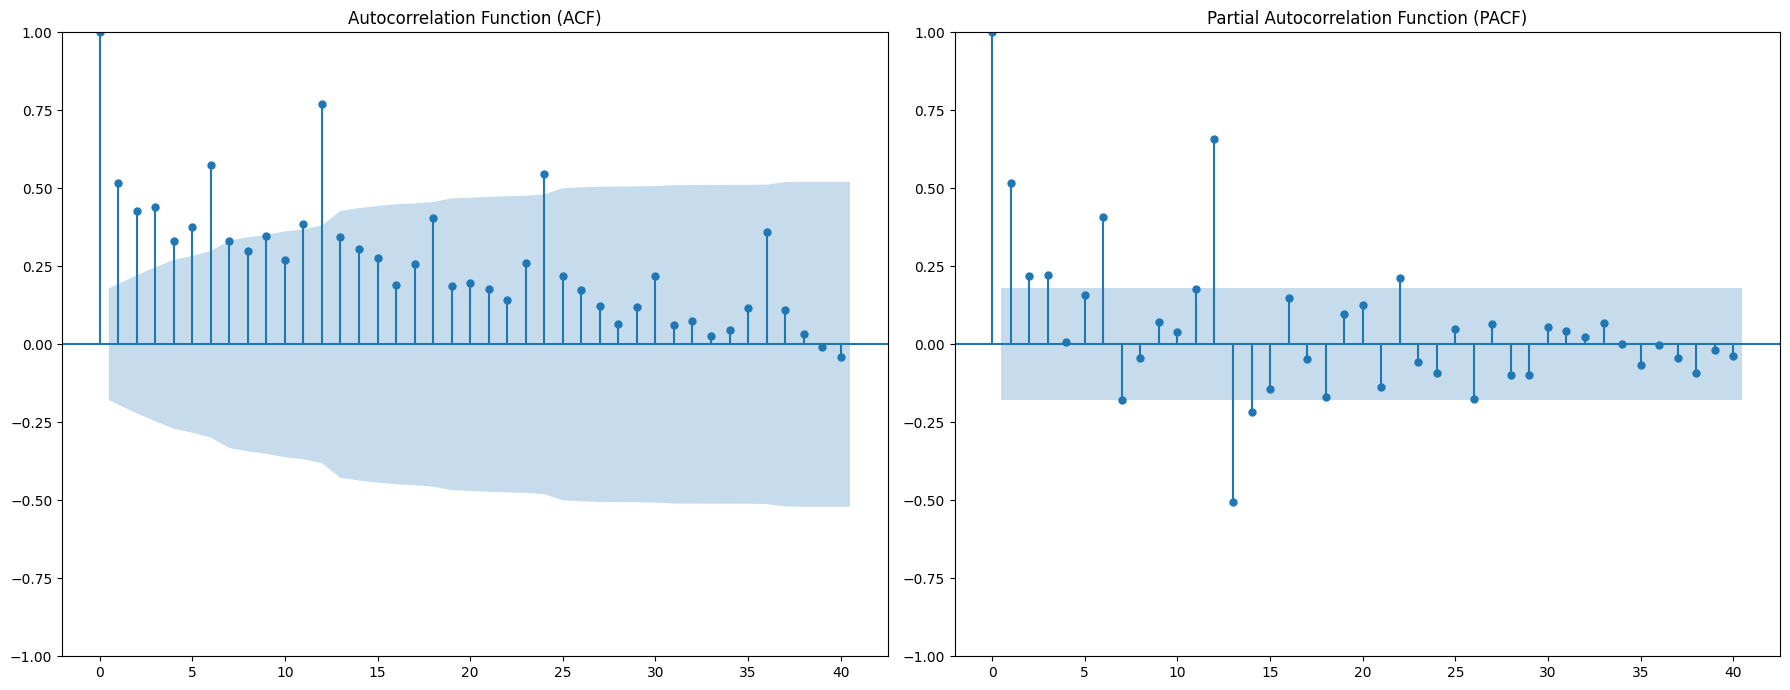

In [119]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Drawing the ACF and PACF plots side by side for ts_data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# ACF plot
plot_acf(ts_data, ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(ts_data, ax=axes[1], lags=40, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()



## ARIMA and Seosanal ARIMA

https://www.youtube.com/watch?v=dXND1OEBABI&list=PLjwX9KFWtvNnOc4HtsvaDf1XYG3O5bv5s&index=7

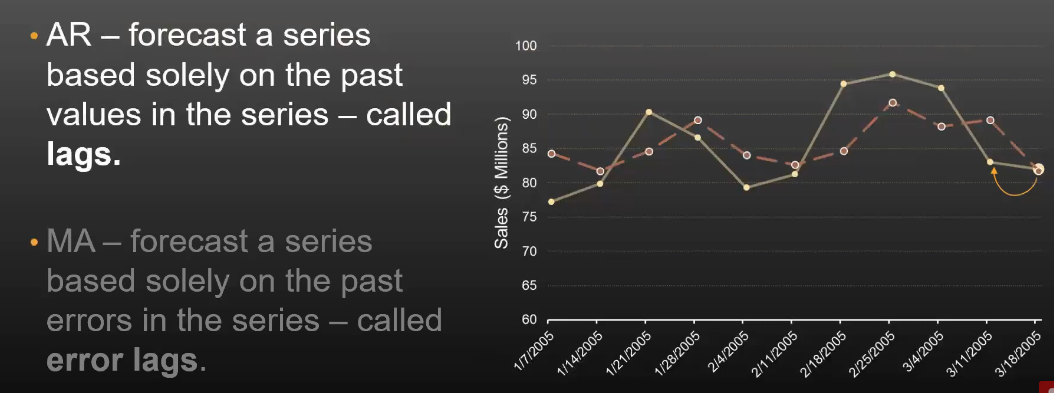 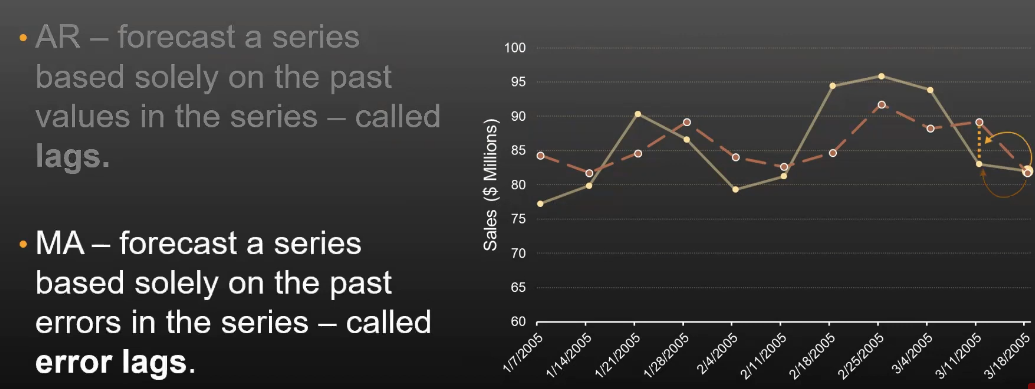

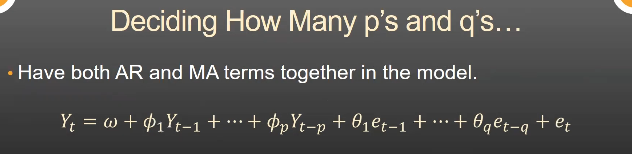

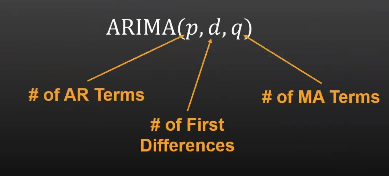  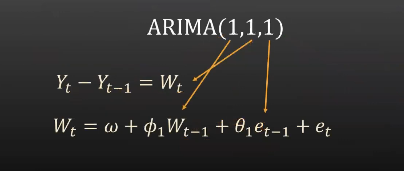

https://www.youtube.com/watch?v=IK67f3IItfw&list=PLjwX9KFWtvNnOc4HtsvaDf1XYG3O5bv5s&index=8

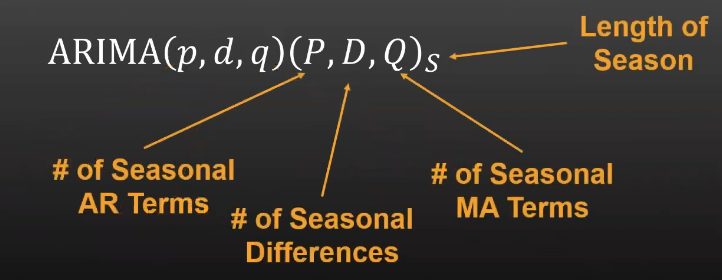


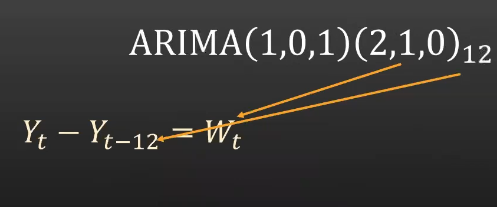 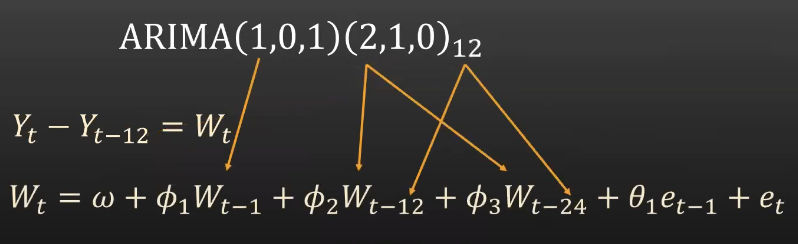
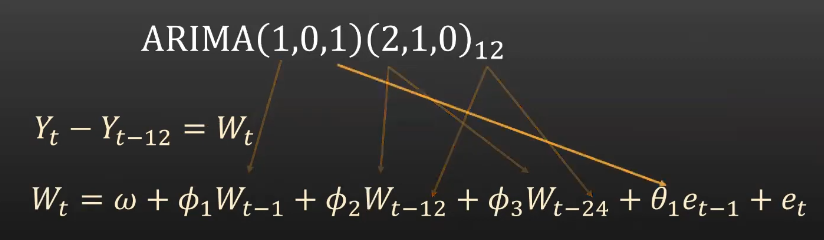


### AD Fuller test to check stationarity

In [120]:
from statsmodels.tsa.stattools import adfuller

In [121]:
adftest = adfuller(ts_data, autolag='AIC')

In [122]:
adftest[1]
# greater than 0.05, so we can say that the data is not stationary

0.9970120297716122

In [123]:
# For white data that we created before cosmetically
adfuller(white_noise, autolag='AIC')[1]

NameError: name 'white_noise' is not defined

### Train Test split

In [124]:
train = ts_data.iloc[:len(ts_data)-24]
test = ts_data.iloc[len(ts_data)-24:]

<Axes: xlabel='date'>

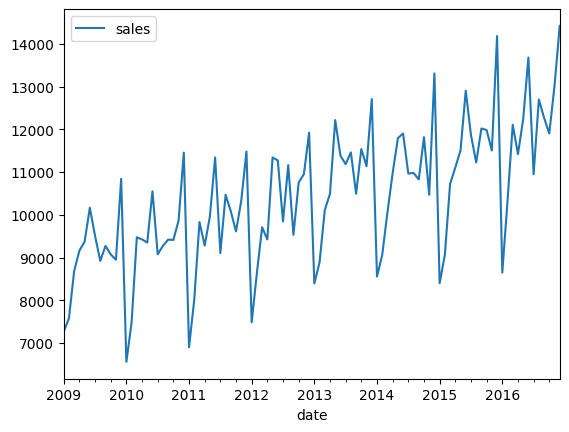

In [125]:
train.plot()

<Axes: xlabel='date'>

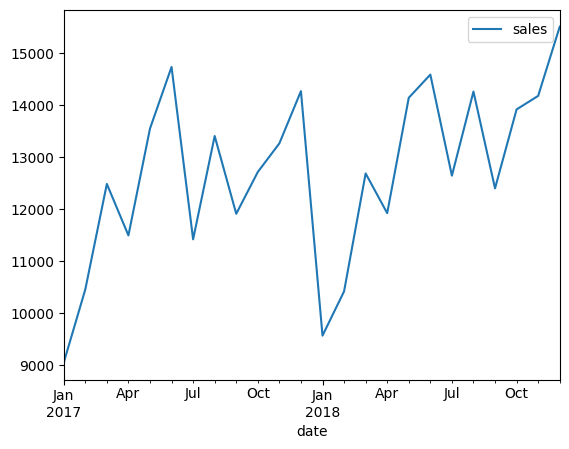

In [126]:
test.plot()

In [127]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [128]:
model = ARIMA(train, order=(5, 1, 3)).fit()
#model = ARIMA(train, order=(2, 2, 2)).fit()

model

In [129]:
pred = model.predict(start=len(train), end=len(train)+len(test)-1)

In [133]:
###  can try this one too, to see predicted sales for training data too with test data
pred = model.predict( end=len(train)+len(test)-1)

In [139]:
###  can try this one too, to see predicted sales for training data only
pred = model.predict()

In [134]:
pred

2009-01-01        0.000000
2009-02-01     5213.115551
2009-03-01     6452.317094
2009-04-01     7503.388935
2009-05-01     7254.560947
                  ...     
2018-08-01    12543.284882
2018-09-01    13085.120090
2018-10-01    11908.236091
2018-11-01    12533.123899
2018-12-01    13073.675737
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

In [ ]:
!pip install scikit-learn

In [137]:
from sklearn.metrics import mean_squared_error

In [140]:
error = mean_squared_error(train, pred)
error

2036653.7739803002

In [141]:
test.mean(), np.sqrt(error)

(sales    12703.791667
 dtype: float64,
 1427.1137915318106)

In [142]:
import matplotlib.pyplot as plt

# Concatenating train, test, and pred data
all_data = pd.concat([train, test, pred], axis=1)
all_data.columns = ['Train', 'Test', 'Predicted']
all_data

Train     Test    Predicted
2009-01-01  7266.0      NaN     0.000000
2009-02-01  7578.0      NaN  5213.115551
2009-03-01  8688.0      NaN  6452.317094
2009-04-01  9162.0      NaN  7503.388935
2009-05-01  9369.0      NaN  7254.560947
...            ...      ...          ...
2018-08-01     NaN  14257.0          NaN
2018-09-01     NaN  12396.0          NaN
2018-10-01     NaN  13914.0          NaN
2018-11-01     NaN  14174.0          NaN
2018-12-01     NaN  15504.0          NaN

[120 rows x 3 columns]

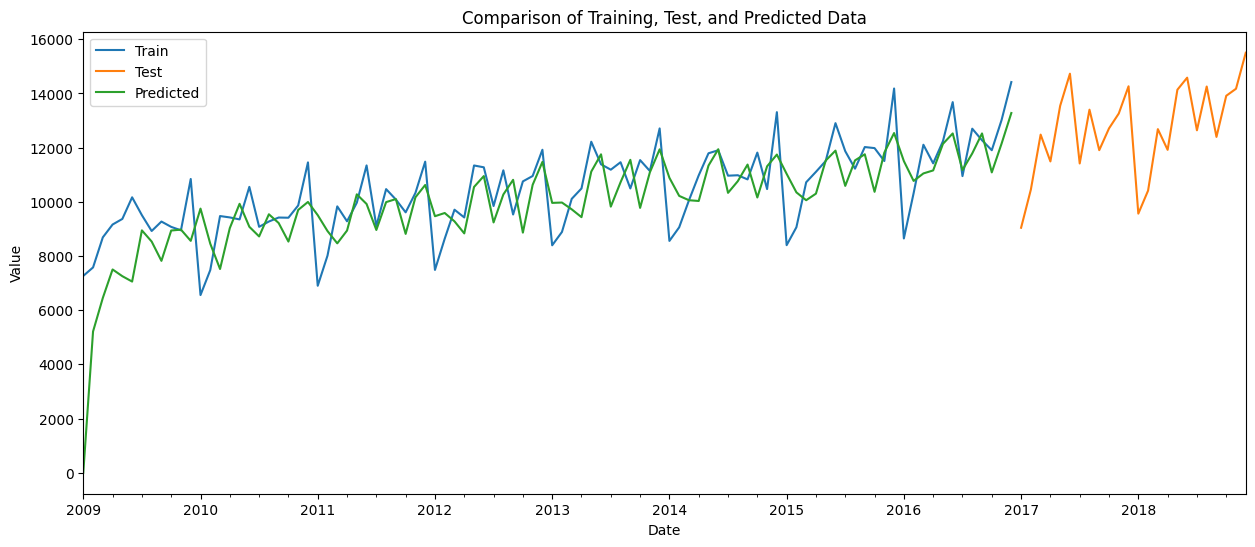

In [143]:
# Plotting all data
plt.figure(figsize=(15, 6))
all_data.plot(ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Training, Test, and Predicted Data')
plt.legend(loc='upper left')
plt.show()


In [173]:
# now training on full data

#final_model = ARIMA(ts, order=(1, 1, 1)).fit()
final_model = ARIMA(ts_data, order=(5, 1, 3)).fit()

In [175]:
# print the summary of the model
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  120
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -1015.553
Date:                Sat, 24 Aug 2024   AIC                           2049.105
Time:                        11:49:00   BIC                           2074.117
Sample:                    01-01-2009   HQIC                          2059.262
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7072      0.123     -5.766      0.000      -0.948      -0.467
ar.L2         -0.6977      0.177     -3.953      0.000      -1.044      -0.352
ar.L3         -0.0218      0.226     -0.096      0.923      -0.465       0.422
ar.L4         -0.3009      0.159     -1.896      0.058      -0.612       0.010
ar.L5         -0.3043      0.119     -2.565      0.010      -0.537      -0.072
ma.L1          0.1155      0.146      0.793      0.428      -0.170       0.401
ma.L2          0.2711      0.161      1.688      0.091      -0.044       0.586
ma.L3         -0.7795      0.146     -5.351      0.000      -1.065      -0.494
sigma2      1.525e+06   7.34e-08   2.08e+13      0.000    1.53e+06    1.53e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                10.37
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               0.87   Skew:                            -0.69
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.05e+28. Standard errors may be unstable.
"""

In [152]:
# ONLY on full data
predicted = final_model.predict()

In [ ]:
forecast = final_model.predict(start=len(ts_data), end=len(ts_data)+12)

<Axes: xlabel='date'>

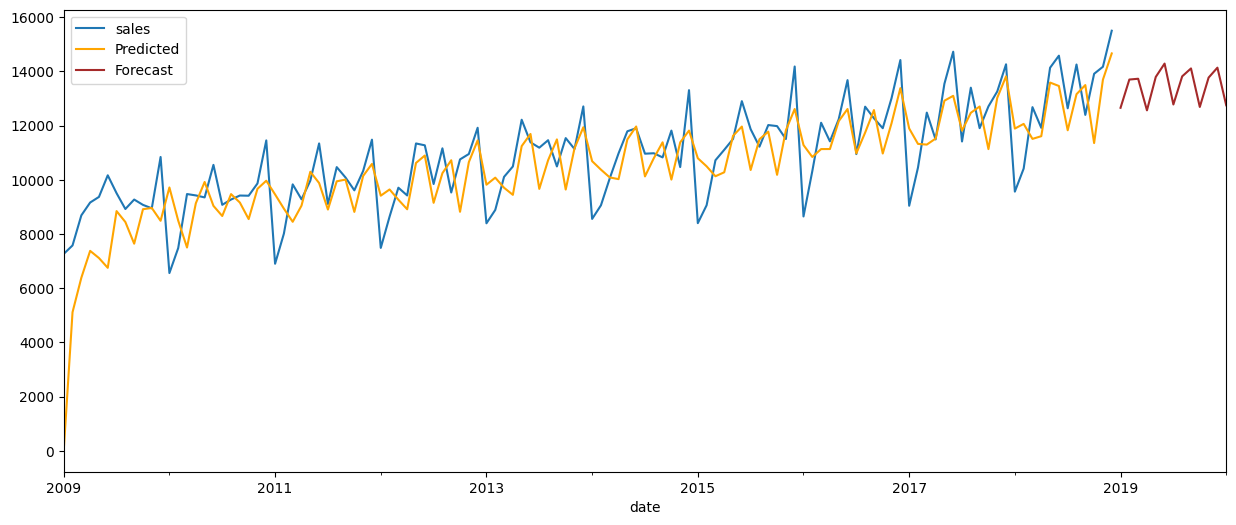

In [157]:
ts_data.plot(legend=True, label='Train', figsize=(15, 6))
predicted.plot(legend=True, label='Predicted', color='orange')
forecast.plot(legend=True, label='Forecast', color='brown')


In [158]:
# calculating the error and rmse
error = mean_squared_error(ts_data, predicted)
rmse = np.sqrt(error)
print(f'The RMSE for the ARIMA model is: {rmse}')

The RMSE for the ARIMA model is: 1411.1806334053288


### Now finding the best pdq combination

In [159]:
import itertools

In [160]:
p = d = q = range(0, 4)

In [161]:
pdq_combinations = list(itertools.product(p, d, q))

In [162]:
pdq_combinations

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [163]:
len(pdq_combinations)

64

In [164]:
rmse = []
order1 = []

In [165]:
for param in pdq_combinations:
    try:
        model = ARIMA(train, order=param).fit()
        pred = model.predict(start=len(train), end=len(train)+len(test)-1)
        error = mean_squared_error(test, pred)
        order1.append(param)
        rmse.append(np.sqrt(error))
        print('ARIMA{} - AIC:{}'.format(param, model.aic))
    except:
        continue

ARIMA(0, 0, 0) - AIC:1691.1613403531933
ARIMA(0, 0, 1) - AIC:1678.3867739996194
ARIMA(0, 0, 2) - AIC:1677.9702178401662
ARIMA(0, 0, 3) - AIC:1670.5093853890278
ARIMA(0, 1, 0) - AIC:1676.7788734381497
ARIMA(0, 1, 1) - AIC:1648.1271479330396
ARIMA(0, 1, 2) - AIC:1648.345031747309
ARIMA(0, 1, 3) - AIC:1651.2178231757794
ARIMA(0, 2, 0) - AIC:1758.6818599217195
ARIMA(0, 2, 1) - AIC:1669.903469884021
ARIMA(0, 2, 2) - AIC:1648.0831967865415
ARIMA(0, 2, 3) - AIC:1645.8110070955524
ARIMA(0, 3, 0) - AIC:1850.502541741508
ARIMA(0, 3, 1) - AIC:1746.138333063768
ARIMA(0, 3, 2) - AIC:1663.0852588389016
ARIMA(0, 3, 3) - AIC:1642.5376255106798
ARIMA(1, 0, 0) - AIC:1671.9045577353775
ARIMA(1, 0, 1) - AIC:1655.865460973657
ARIMA(1, 0, 2) - AIC:1657.4247876881564
ARIMA(1, 0, 3) - AIC:1658.9161121603952
ARIMA(1, 1, 0) - AIC:1661.7981024698108
ARIMA(1, 1, 1) - AIC:1648.3498027028982
ARIMA(1, 1, 2) - AIC:1647.6999401513503
ARIMA(1, 1, 3) - AIC:1652.6220821220677
ARIMA(1, 2, 0) - AIC:1715.972147661546
ARIMA(

In [166]:
rmse = []
order1 = []
# Dealing only with the full data
for param in pdq_combinations:
    try:
        model = ARIMA(ts_data, order=param).fit()
        pred = model.predict()
        error = mean_squared_error(ts_data, pred)
        order1.append(param)
        rmse.append(np.sqrt(error))
        print('ARIMA{} - RMSE:{} - AIC:{}'.format(param, np.sqrt(error), model.aic))
    except:
        continue

ARIMA(0, 0, 0) - RMSE:1843.1614030540932 - AIC:2149.164416227478
ARIMA(0, 0, 1) - RMSE:1654.3707893971834 - AIC:2124.679910681566
ARIMA(0, 0, 2) - RMSE:1621.258595363284 - AIC:2123.0357135334093
ARIMA(0, 0, 3) - RMSE:1517.829605750948 - AIC:2107.492345627461
ARIMA(0, 1, 0) - RMSE:1855.7872992344785 - AIC:2115.6461624184403
ARIMA(0, 1, 1) - RMSE:1595.6179447233305 - AIC:2073.839576561031
ARIMA(0, 1, 2) - RMSE:1583.0683048272722 - AIC:2074.0401232197114
ARIMA(0, 1, 3) - RMSE:1582.972764597197 - AIC:2075.912459403016
ARIMA(0, 2, 0) - RMSE:3054.8335125795306 - AIC:2222.524208924234
ARIMA(0, 2, 1) - RMSE:1928.6440404156392 - AIC:2108.551582443778
ARIMA(0, 2, 2) - RMSE:1697.405657206408 - AIC:2070.5680730593576
ARIMA(0, 2, 3) - RMSE:1668.2190285659397 - AIC:2068.750270829704
ARIMA(0, 3, 0) - RMSE:5475.487865239057 - AIC:2341.8168358985363
ARIMA(0, 3, 1) - RMSE:3167.658763635834 - AIC:2210.080264502534
ARIMA(0, 3, 2) - RMSE:2112.382707366292 - AIC:2099.8244337723304
ARIMA(0, 3, 3) - RMSE:1922

In [167]:
#results = pd.DataFrame(list(zip(order1, rmse)), columns=['(p, d, q)', 'RMSE'])
results = pd.DataFrame(zip(order1, rmse), columns=['(p, d, q)', 'RMSE'])
results.sort_values(by='RMSE', ascending=True)

(p, d, q)         RMSE
51  (3, 0, 3)  1254.204543
50  (3, 0, 2)  1282.939397
35  (2, 0, 3)  1345.058125
34  (2, 0, 2)  1357.634989
19  (1, 0, 3)  1382.399944
..        ...          ...
44  (2, 3, 0)  2973.130482
8   (0, 2, 0)  3054.833513
13  (0, 3, 1)  3167.658764
28  (1, 3, 0)  3928.467119
12  (0, 3, 0)  5475.487865

[64 rows x 2 columns]

In [168]:
# Find the index of the minimum RMSE value
min_rmse_index = results['RMSE'].idxmin()

# Get the corresponding (p, d, q) values
best_pdq = results.loc[min_rmse_index, '(p, d, q)']

print("Best (p, d, q) with least RMSE:", best_pdq)


Best (p, d, q) with least RMSE: (3, 0, 3)


In [117]:
results.to_csv('results.csv', index=False)
# so 0,2,2, is best combination

In [176]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'ts' is your time series data

# Define SARIMA model order and seasonal_order
order = (2, 2, 2)  # Non-seasonal order
seasonal_order = (0, 1, 1, 12)  # Seasonal order (P, D, Q, m)

# Fit SARIMA model
# sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order).fit()
sarima_model = SARIMAX(ts_data, order=order, seasonal_order=seasonal_order).fit()

# Print model summary
print(sarima_model.summary())



                                      SARIMAX Results                                       
Dep. Variable:                                sales   No. Observations:                  120
Model:             SARIMAX(2, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -816.957
Date:                              Sat, 24 Aug 2024   AIC                           1645.914
Time:                                      11:49:39   BIC                           1661.895
Sample:                                  01-01-2009   HQIC                          1652.391
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8958      0.084    -10.682      0.000      -1.060      -0.731
ar.L2         -0.62

In [127]:
ts_data

sales
date             
2009-01-01   7266
2009-02-01   7578
2009-03-01   8688
2009-04-01   9162
2009-05-01   9369
...           ...
2018-08-01  14257
2018-09-01  12396
2018-10-01  13914
2018-11-01  14174
2018-12-01  15504

[120 rows x 1 columns]

In [177]:
from sklearn.metrics import mean_squared_error

# Generate forecasts for the testing set
#forecast = sarima_model.forecast(steps=len(test))

# Predict the values for the training data
train_predictions = sarima_model.predict()

# Calculate Mean Squared Error (MSE)
# mse_sarima = mean_squared_error(ts_data, forecast)
mse_sarima = mean_squared_error(ts_data, train_predictions)

print("SARIMA RMSE:", np.sqrt(mse_sarima))


SARIMA RMSE: 1293.0755290673646


In [178]:
# We could also run a loop to find be st combination of p,d,q and P,D,Q
# but it is computationally expensive

# Now we are running on the full data
# Define SARIMA model order and seasonal_order
order = (2, 2, 2)  # Non-seasonal order
seasonal_order = (0, 1, 1, 12)  # Seasonal order (P, D, Q, m)

# Fit SARIMA model
sarima_model = SARIMAX(ts_data, order=order, seasonal_order=seasonal_order).fit()

<Axes: xlabel='date'>

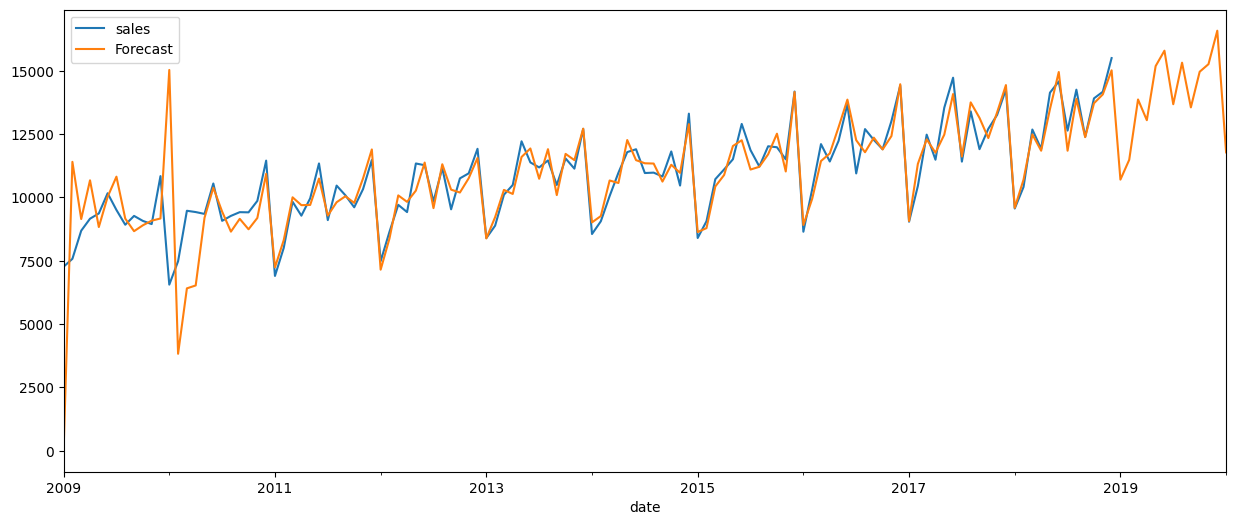

In [179]:
forecast = sarima_model.predict( end=len(ts_data)+12) #, start = len(ts_data)
ts_data.plot(legend=True, label='Train', figsize=(15, 6))
forecast.plot(legend=True, label='Forecast')

In [ ]:
!pip install pmdarima

In [180]:
import pmdarima   # pmdarima is a library that wraps around statsmodels and provides a more user-friendly interface
from pmdarima import auto_arima
auto_arima(ts_data, seasonal=True, m=12, stepwise=True, suppress_warnings=True, error_action="ignore", trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1659.362, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1656.687, Time=0.91 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1655.434, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1716.248, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1658.000, Time=0.20 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1650.085, Time=0.84 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1657.177, Time=0.22 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=1650.618, Time=1.92 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1651.665, Time=0.51 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1648.860, Time=1.07 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1652.882, Time=0.72 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1654.431, Time=1.17 sec
 ARIMA(0,0,2)(0,1,2)[12] intercept   : AIC=1647.330, Time=1.71 sec
 ARIMA(0,0,2)(0,1,1)[12]

ARIMA(order=(1, 0, 3), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True)

In [181]:
# Now running Sarimax with best model that we got from autoarima
order = (1, 0, 3)  # Non-seasonal order
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, m)

# Fit SARIMA model
final_model = SARIMAX(ts_data, order=order, seasonal_order=seasonal_order).fit()


<Axes: xlabel='date'>

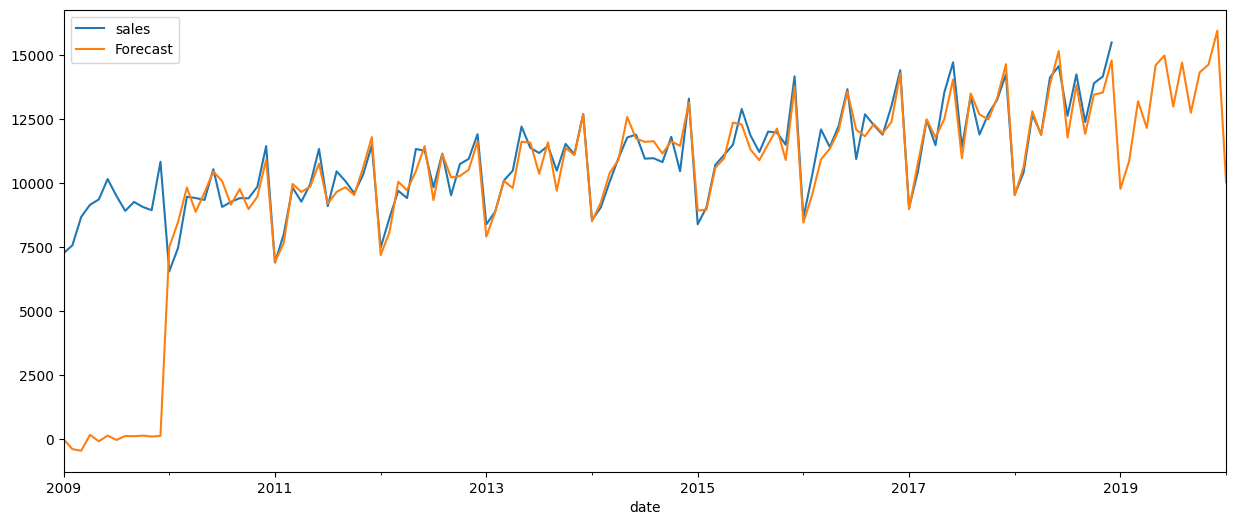

In [182]:
forecast = final_model.predict( end=len(ts_data)+12) #, start = len(ts_data)
ts_data.plot(legend=True, label='Train', figsize=(15, 6))
forecast.plot(legend=True, label='Forecast')

### Prophet - Kind of automl in timeseries forecasting

For a quick overview:
https://www.youtube.com/watch?v=2XFro0nIHQM&list=PLjwX9KFWtvNnOc4HtsvaDf1XYG3O5bv5s&index=10

================

https://facebook.github.io/prophet/docs/quick_start.html

https://github.com/nicknochnack/TimeSeriesForecastingProphet/blob/main/Facebook%20Prophet.ipynb

In [ ]:
#!pip install pystan
!pip install prophet

In [183]:
import pandas as pd
from prophet import Prophet

In [184]:
df = pd.read_csv(r"C:\Users\noman\My Drive\ABP\Arima_LSTM\drinks_Sales.csv")
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])


In [52]:
df

ds      y
0   1992-01-01   3459
1   1992-02-01   3458
2   1992-03-01   4002
3   1992-04-01   4564
4   1992-05-01   4221
..         ...    ...
320 2018-09-01  12396
321 2018-10-01  13914
322 2018-11-01  14174
323 2018-12-01  15504
324 2019-01-01  10718

[325 rows x 2 columns]

In [185]:
# Convert 'ds' column to datetime if it's not already in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Create a subset starting from the year 2009
df2 = df[df['ds'].dt.year >= 2009]

# Print the subset
print(df2)

            ds      y
204 2009-01-01   7266
205 2009-02-01   7578
206 2009-03-01   8688
207 2009-04-01   9162
208 2009-05-01   9369
..         ...    ...
320 2018-09-01  12396
321 2018-10-01  13914
322 2018-11-01  14174
323 2018-12-01  15504
324 2019-01-01  10718

[121 rows x 2 columns]


In [186]:
print(df2.tail(n=14))

            ds      y
311 2017-12-01  14265
312 2018-01-01   9564
313 2018-02-01  10415
314 2018-03-01  12683
315 2018-04-01  11919
316 2018-05-01  14138
317 2018-06-01  14583
318 2018-07-01  12640
319 2018-08-01  14257
320 2018-09-01  12396
321 2018-10-01  13914
322 2018-11-01  14174
323 2018-12-01  15504
324 2019-01-01  10718


In [188]:
m = Prophet()
model = m.fit(df2)

12:10:47 - cmdstanpy - INFO - Chain [1] start processing
12:10:47 - cmdstanpy - INFO - Chain [1] done processing


In [189]:
future = m.make_future_dataframe(periods=20,freq='M')
future.tail(n=30)


ds
111 2018-04-01
112 2018-05-01
113 2018-06-01
114 2018-07-01
115 2018-08-01
116 2018-09-01
117 2018-10-01
118 2018-11-01
119 2018-12-01
120 2019-01-01
121 2019-01-31
122 2019-02-28
123 2019-03-31
124 2019-04-30
125 2019-05-31
126 2019-06-30
127 2019-07-31
128 2019-08-31
129 2019-09-30
130 2019-10-31
131 2019-11-30
132 2019-12-31
133 2020-01-31
134 2020-02-29
135 2020-03-31
136 2020-04-30
137 2020-05-31
138 2020-06-30
139 2020-07-31
140 2020-08-31

In [190]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(n=30)

ds          yhat    yhat_lower    yhat_upper
111 2018-04-01  12604.550621  12048.710053  13170.317999
112 2018-05-01  13536.645106  12967.814994  14119.418044
113 2018-06-01  14352.262649  13773.181539  14885.319557
114 2018-07-01  12820.077349  12244.518291  13371.656698
115 2018-08-01  13394.676364  12834.291597  13908.181273
116 2018-09-01  13015.903491  12460.545793  13542.921435
117 2018-10-01  13396.191970  12834.166286  13935.146554
118 2018-11-01  13405.916022  12854.181378  13932.599701
119 2018-12-01  15196.992142  14642.483500  15759.429863
120 2019-01-01  10573.427201  10091.877802  11106.448543
121 2019-01-31  11986.949601  11447.327738  12509.892823
122 2019-02-28  13086.902049  12537.244899  13604.116277
123 2019-03-31  13596.887872  13056.055635  14159.311980
124 2019-04-30  13056.277623  12483.424775  13587.429041
125 2019-05-31  14989.018545  14438.123535  15509.910696
126 2019-06-30  13974.430689  13423.497973  14538.710396
127 2019-07-31  12974.509228  12419.216444  13468.205291
128 2019-08-31  14404.633644  13861.791259  14942.514975
129 2019-09-30  13933.292991  13366.317503  14489.656084
130 2019-10-31  13150.746090  12604.508951  13674.498979
131 2019-11-30  16331.168247  15745.954974  16845.637533
132 2019-12-31  10427.673259   9875.370914  10984.894650
133 2020-01-31  12589.095814  12061.696190  13141.895595
134 2020-02-29  13642.268747  13109.112609  14184.561012
135 2020-03-31  13821.273473  13273.771468  14370.277925
136 2020-04-30  14157.293207  13638.329449  14711.002597
137 2020-05-31  15409.208757  14920.761404  15949.953887
138 2020-06-30  14097.083146  13496.760329  14604.415342
139 2020-07-31  14035.463689  13477.686096  14547.689292
140 2020-08-31  14378.054865  13852.838853  14922.607607

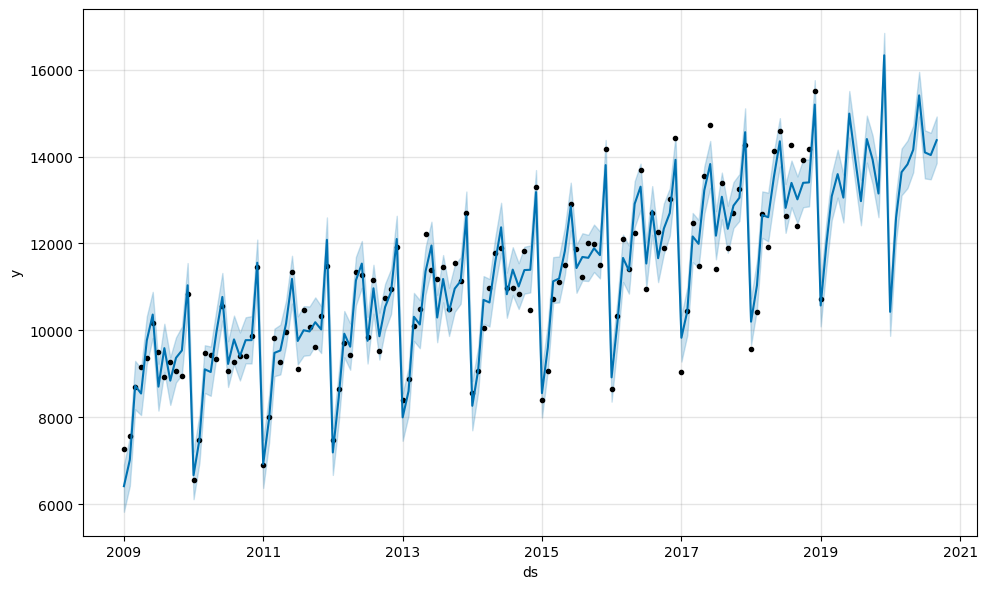

In [191]:
plot1 = m.plot(forecast)

In [193]:
from sklearn.metrics import mean_squared_error

# Generate forecasts for the testing set
predictions = model.predict(df2)

# Extract the forecasted values
predictions_values = predictions['yhat'].values

# Extract the actual values from the testing set
actual_values = df2['y'].values

# Calculate Mean Squared Error (MSE)
mse_prophet = mean_squared_error(actual_values, predictions_values)

print("Prophet RMSE:", np.sqrt(mse_prophet))


Prophet RMSE: 424.67670908965067


## LSTM

In [60]:
import pandas as pd
import numpy as np

In [ ]:
!pip install tensorflow

In [61]:
import tensorflow as tf
print(tf.__version__)

2.16.1


https://github.com/bnsreenu/python_for_microscopists/blob/master/166a-Intro_to_time_series_Forecasting_using_LSTM.py

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

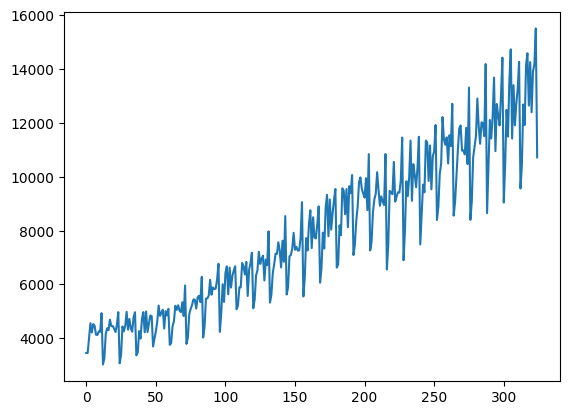

In [239]:
# load the dataset
dataframe = pd.read_csv(r"C:\Users\noman\My Drive\ABP\Arima_LSTM\drinks_Sales.csv")
#dataframe = read_csv('data/AirPassengers.csv', usecols=[1])

plt.plot(dataframe['sales'])

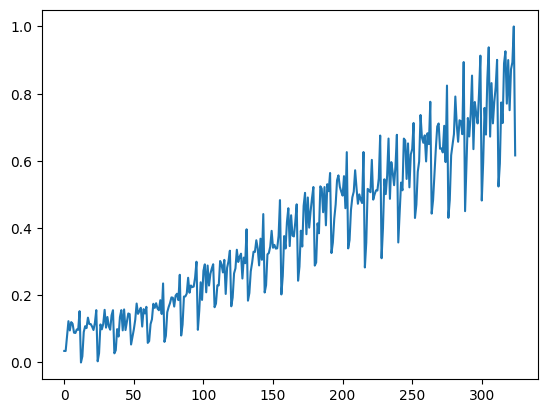

In [240]:
#Convert pandas dataframe to numpy array
dataset = dataframe['sales'].values
dataset = dataset.astype('float32') #Convert values to float


# LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
dataset_reshaped = np.reshape(dataset, (-1, 1)) #Reshape the array into 1 column to make it ready to be fed into the scaler. Kind of from 1D to 2D. -1 means that the value is inferred from the length of the array. 1 is the number of columns.
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset_norm = scaler.fit_transform(dataset_reshaped)

plt.plot(dataset_norm)

In [241]:
# We cannot use random way of splitting dataset into train and test as
# the sequence of events is important for time series.
# So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset_norm) * 0.66)
test_size = len(dataset_norm) - train_size
train, test = dataset_norm[0:train_size,:], dataset_norm[train_size:len(dataset),:]


# We cannot fit the model like we normally do for image processing where we have
# X and Y. We need to transform our data into something that looks like X and Y values.
# This way it can be trained on a sequence rather than indvidual datapoints. 
# Let us convert into n number of columns for X where we feed sequence of numbers
# then the final column as Y where we provide the next number in the sequence as output.
# So let us convert an array of values into a dataset matrix

#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period.

#creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
#and Y is the number of passengers at the next time (t + 1).

In [199]:
train_size, test_size

(214, 111)

In [200]:
train.shape, test.shape

((214, 1), (111, 1))

In [242]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [256]:
#seq_size = 10  # first try with 10 and then see results (not good as there is seasonality of 12 periods so 10 does not help much) 
seq_size = 12  # Number of time steps to look back 


#Larger sequences (look further back) may improve forecasting.
# resulting X/y are 2D array where X is the number of passengers at a given time (t, t-1, t-2...)
# and Y is the number of passengers at the next time (t + 1).
# resulting array will be seq_size-1 less than the original dataset as we are predicting the next value

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

print("Shape of training X set: {}".format(trainX.shape))
print("Shape of test X set: {}".format(testX.shape))
print("Shape of training Y set: {}".format(trainY.shape))
print("Shape of test Y set: {}".format(testY.shape))

Shape of training X set: (201, 12)
Shape of test X set: (98, 12)
Shape of training Y set: (201,)
Shape of test Y set: (98,)


In [257]:
# print trainX as dataframe
print(pd.DataFrame(trainX).head())



         0         1         2         3         4         5         6   \
0  0.034314  0.034234  0.077848  0.122905  0.095406  0.120099  0.115048   
1  0.034234  0.077848  0.122905  0.095406  0.120099  0.115048  0.088672   
2  0.077848  0.122905  0.095406  0.120099  0.115048  0.088672  0.087790   
3  0.122905  0.095406  0.120099  0.115048  0.088672  0.087790  0.098453   
4  0.095406  0.120099  0.115048  0.088672  0.087790  0.098453  0.096929   

         7         8         9         10        11  
0  0.088672  0.087790  0.098453  0.096929  0.152730  
1  0.087790  0.098453  0.096929  0.152730  0.000000  
2  0.098453  0.096929  0.152730  0.000000  0.018440  
3  0.096929  0.152730  0.000000  0.018440  0.090516  
4  0.152730  0.000000  0.018440  0.090516  0.107913  


In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [265]:
# A basic model 
model1 = Sequential()
model1.add(InputLayer(input_shape=(seq_size, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])


In [266]:
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [267]:
###############################################
model1.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=50)

Epoch 1/50
7/7 - 2s - 326ms/step - loss: 0.0545 - root_mean_squared_error: 0.2438 - val_loss: 0.1334 - val_root_mean_squared_error: 0.3125
Epoch 2/50
7/7 - 0s - 12ms/step - loss: 0.0097 - root_mean_squared_error: 0.0939 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1147
Epoch 3/50
7/7 - 0s - 16ms/step - loss: 0.0079 - root_mean_squared_error: 0.0913 - val_loss: 0.0487 - val_root_mean_squared_error: 0.1815
Epoch 4/50
7/7 - 0s - 10ms/step - loss: 0.0072 - root_mean_squared_error: 0.0835 - val_loss: 0.0473 - val_root_mean_squared_error: 0.1802
Epoch 5/50
7/7 - 0s - 11ms/step - loss: 0.0059 - root_mean_squared_error: 0.0744 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1102
Epoch 6/50
7/7 - 0s - 10ms/step - loss: 0.0043 - root_mean_squared_error: 0.0689 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1230
Epoch 7/50
7/7 - 0s - 11ms/step - loss: 0.0041 - root_mean_squared_error: 0.0648 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1147
Epoch 8/50
7/7 - 0s - 13ms/step -

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 743.40 RMSE
Test Score: 1453.34 RMSE


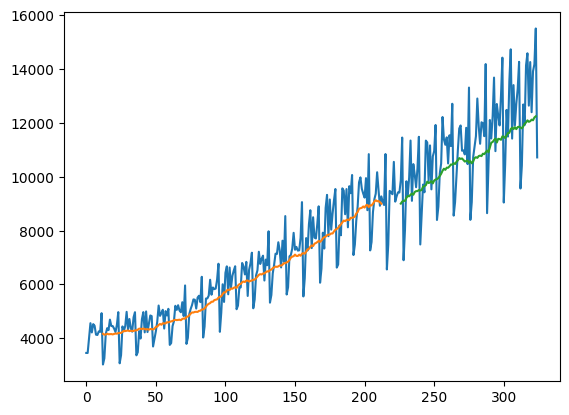

In [268]:
# make predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredictInv = scaler.inverse_transform(trainPredict)
trainYInv = scaler.inverse_transform([trainY])
testPredictInv = scaler.inverse_transform(testPredict)
testYInv = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainYInv[0], trainPredictInv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testYInv[0], testPredictInv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
# we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset_reshaped)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredictInv)+seq_size, :] = trainPredictInv

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_reshaped)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredictInv)+(seq_size*2)+1:len(dataset)-1, :] = testPredictInv

# plot baseline and predictions
plt.plot((dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [269]:
# Here i am using another more basic version of LSTM 

# Create the Sequential model
model2 = Sequential()

# Add an LSTM layer with 64 units and relu activation
#model2.add(LSTM(units=64, activation='relu', input_shape=(seq_size, 1)))

# We can try with different numbers of units (1,4,12,24 ...) in the hiddent LSTM layer
model2.add(LSTM(units=24, activation='relu', input_shape=(seq_size, 1)))

# Add a Dense output layer with 1 unit (for regression)
model2.add(Dense(units=1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model2.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 24)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,521 (9.85 KB)

 Trainable params: 2,521 (9.85 KB)

 Non-trainable params: 0 (0.00 B)

In [270]:
# Train the model
model2.fit(trainX, trainY, validation_data=(testX, testY), verbose=2, epochs=50)

Epoch 1/50


7/7 - 2s - 340ms/step - loss: 0.0824 - val_loss: 0.4882
Epoch 2/50
7/7 - 0s - 10ms/step - loss: 0.0681 - val_loss: 0.4335
Epoch 3/50
7/7 - 0s - 10ms/step - loss: 0.0586 - val_loss: 0.3824
Epoch 4/50
7/7 - 0s - 10ms/step - loss: 0.0489 - val_loss: 0.3315
Epoch 5/50
7/7 - 0s - 10ms/step - loss: 0.0362 - val_loss: 0.2753
Epoch 6/50
7/7 - 0s - 12ms/step - loss: 0.0262 - val_loss: 0.2060
Epoch 7/50
7/7 - 0s - 10ms/step - loss: 0.0160 - val_loss: 0.1265
Epoch 8/50
7/7 - 0s - 11ms/step - loss: 0.0102 - val_loss: 0.0614
Epoch 9/50
7/7 - 0s - 10ms/step - loss: 0.0077 - val_loss: 0.0387
Epoch 10/50
7/7 - 0s - 10ms/step - loss: 0.0060 - val_loss: 0.0324
Epoch 11/50
7/7 - 0s - 10ms/step - loss: 0.0054 - val_loss: 0.0188
Epoch 12/50
7/7 - 0s - 10ms/step - loss: 0.0055 - val_loss: 0.0110
Epoch 13/50
7/7 - 0s - 9ms/step - loss: 0.0045 - val_loss: 0.0115
Epoch 14/50
7/7 - 0s - 9ms/step - loss: 0.0049 - val_loss: 0.0127
Epoch 15/50
7/7 - 0s - 9ms/step - loss: 0.0039 - val_loss: 0.0117
Epoch 16/50
7/7 -

In [271]:
# make predictions
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredictInv = scaler.inverse_transform(trainPredict)
trainYInv = scaler.inverse_transform([trainY])
testPredictInv = scaler.inverse_transform(testPredict)
testYInv = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainYInv[0], trainPredictInv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testYInv[0], testPredictInv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 761.68 RMSE
Test Score: 1354.54 RMSE


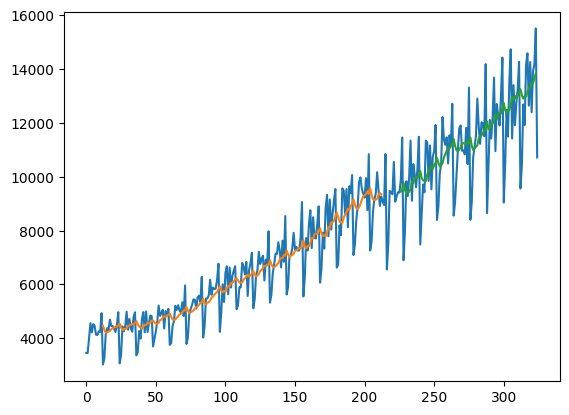

In [272]:
# shift train predictions for plotting
# we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset_reshaped)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredictInv)+seq_size, :] = trainPredictInv

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_reshaped)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredictInv)+(seq_size*2)+1:len(dataset)-1, :] = testPredictInv

# plot baseline and predictions
plt.plot((dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

https://www.youtube.com/watch?v=b61DPVFX03I

https://github.com/bnsreenu/python_for_microscopists/blob/master/166a-Intro_to_time_series_Forecasting_using_LSTM.py

### AWS CHRONOS - LLM based model

https://huggingface.co/amazon/chronos-t5-tiny

In [273]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to c:\users\noman\appdata\local\temp\pip-req-build-x8ri87t8
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit eb7bdfc047de3e7af972b4ee7cf23a7968b7daa3
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ---------------------------------------- 43.7/43.7 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.6/9

  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git 'C:\Users\noman\AppData\Local\Temp\pip-req-build-x8ri87t8'
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: c:\Users\noman\.pyenv\pyenv-win\versions\3.10.11\python.exe -m pip install --upgrade pip


In [276]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

In [ ]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cuda", # i dont have GPU so will use CPU next
  torch_dtype=torch.bfloat16,
)

In [295]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cpu",
  torch_dtype=torch.float32,  # Change dtype to float32 when running on CPU
)


In [278]:
df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [ ]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["#Passengers"])
prediction_length = 24
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


In [281]:
ts_data_full = pd.read_csv(r"drinks_Sales.csv", parse_dates=['date'] , index_col='date')
ts_data = ts_data_full['2009':'2018']
# unindex the data
ts_data = ts_data.reset_index()
ts_data.head()

date  sales
0 2009-01-01   7266
1 2009-02-01   7578
2 2009-03-01   8688
3 2009-04-01   9162
4 2009-05-01   9369

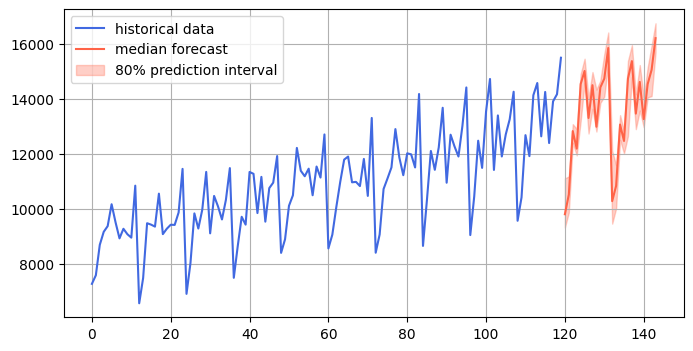

In [293]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(ts_data["sales"])
prediction_length = 24
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(ts_data), len(ts_data) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(ts_data["sales"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


In [294]:
# Seems like it does not predict of existing data, rather the predict function predicts only future data. Therefore, we need to split the data into training and testing sets and then predict the future sales.
# 
# # Split the data into training and testing sets
# Let's assume we want to use the last 12 months as the test set
train_data = ts_data[:-12]
test_data = ts_data[-12:]

# Convert the sales data to tensors
train_context = torch.tensor(train_data["sales"].values)
test_context = torch.tensor(test_data["sales"].values)

# Predict sales for the test period using the pipeline
prediction_length = len(test_data)
forecast = pipeline.predict(train_context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# Extract the median forecast
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

# Calculate RMSE between the actual test data and the median forecast
rmse = np.sqrt(mean_squared_error(test_data["sales"], median))
print(f"RMSE: {rmse}")

RMSE: 561.0754735232748
